#                                                                                    Erblin Marku
#                                                                                Msc Computer Science 
#                                                                           Queen Mary University of London
#                                                                             Data Analytics Coursework 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#I will use seaborn library which is build on top of matplotlib for vizualisation
import seaborn as sns
# I have a lot of warnings so for visualizations I am going to ignore them.
import warnings
warnings.filterwarnings('ignore')

# 1- Data Exploration

In [2]:
#just loading the main csv without the results table which we will merge later.
crd_df = pd.read_csv('application_record.csv')

In [3]:
#checking the first 10 rows of the dataframe to see how our data is imported
crd_df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [4]:
crd_df.info()
#info says we have 18 columns and 438557 entries(rows)
#we see that in the rows we have some data missing in the occupation type since we have less entries.
#the others seem ok for now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
#first I am going to sort the dataframe by id do get it inline for further merging
crd_df = crd_df.sort_values('ID')
crd_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423317,7999660,F,N,N,0,90000.0,State servant,Higher education,Single / not married,House / apartment,-13432,-5446,1,0,0,0,Core staff,1.0
426434,7999696,F,N,Y,2,135000.0,State servant,Secondary / secondary special,Married,House / apartment,-12576,-4382,1,0,0,0,Medicine staff,4.0
432885,7999738,M,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-9970,-119,1,0,0,0,NaN,2.0
421225,7999784,F,Y,Y,1,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-10630,-454,1,0,0,0,NaN,3.0


## Check if we have duplicated records and remove them to get the uniqe size data

In [6]:
#check the ID for duplicates and drop those rows by keeping only the last one of the duplicated
crd_df.drop_duplicates(subset=['ID'], keep='last', inplace=True)

In [7]:
#lets check the new data size
crd_df.count()

ID                     438510
CODE_GENDER            438510
FLAG_OWN_CAR           438510
FLAG_OWN_REALTY        438510
CNT_CHILDREN           438510
AMT_INCOME_TOTAL       438510
NAME_INCOME_TYPE       438510
NAME_EDUCATION_TYPE    438510
NAME_FAMILY_STATUS     438510
NAME_HOUSING_TYPE      438510
DAYS_BIRTH             438510
DAYS_EMPLOYED          438510
FLAG_MOBIL             438510
FLAG_WORK_PHONE        438510
FLAG_PHONE             438510
FLAG_EMAIL             438510
OCCUPATION_TYPE        304322
CNT_FAM_MEMBERS        438510
dtype: int64

In [8]:
#generate discriptive statistics from our data with describe() function
crd_df.describe()
#added this code to change the number from scientific notation to numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#we can also transpose the table for better view
crd_df.describe()
#crd_df.describe().T

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,438510.00,438510.00,438510.00,438510.00,438510.00,438510.00,438510.00,438510.00,438510.00,438510.00
mean,6022034.96,0.43,187524.26,-15997.89,60561.99,1.00,0.21,0.29,0.11,2.19
std,571496.24,0.72,110087.41,4185.00,138766.43,0.00,0.40,0.45,0.31,0.90
min,5008804.00,0.00,26100.00,-25201.00,-17531.00,1.00,0.00,0.00,0.00,1.00
25%,5609362.25,0.00,121500.00,-19483.00,-3103.00,1.00,0.00,0.00,0.00,2.00
50%,6047719.50,0.00,161100.00,-15630.00,-1468.00,1.00,0.00,0.00,0.00,2.00
75%,6454160.75,1.00,225000.00,-12514.00,-371.00,1.00,0.00,1.00,0.00,3.00
max,7999952.00,19.00,6750000.00,-7489.00,365243.00,1.00,1.00,1.00,1.00,20.00


# 2- Visualization

<Figure size 576x576 with 0 Axes>

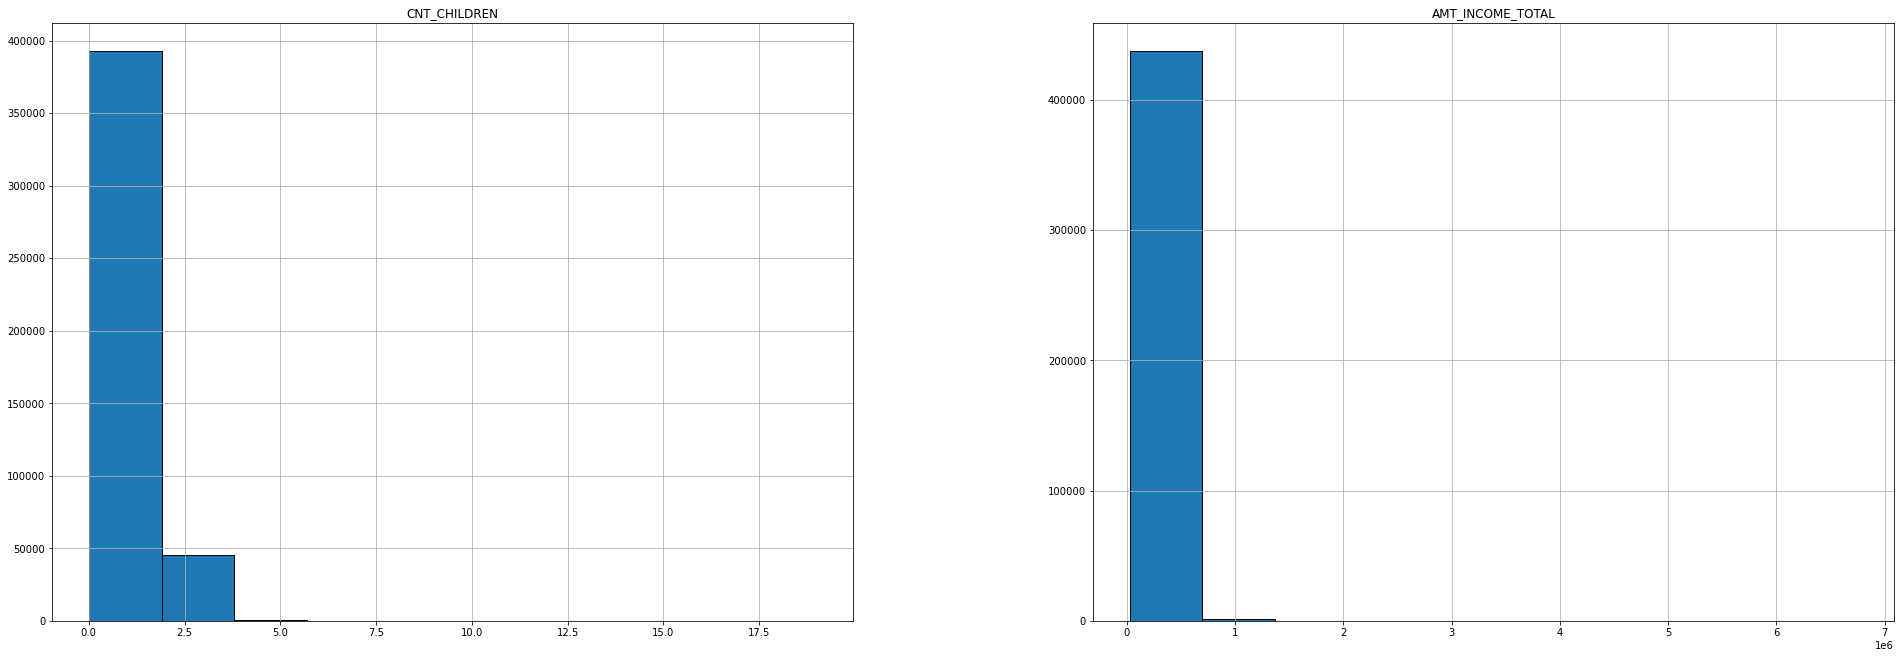

In [9]:
plt.figure(figsize=(8,8))
#I will check children count, total income, age and employment days to see any negative patterns
# these plots are the ones I can check numerically, the others I will have to plot different type of tables
cols_to_plot = ["CNT_CHILDREN","AMT_INCOME_TOTAL"]
crd_df[cols_to_plot].hist(edgecolor='black', linewidth=1)
dev_check=plt.gcf()#get current figure, if no figure create a new one
dev_check.set_size_inches(33,11)

<Figure size 576x576 with 0 Axes>

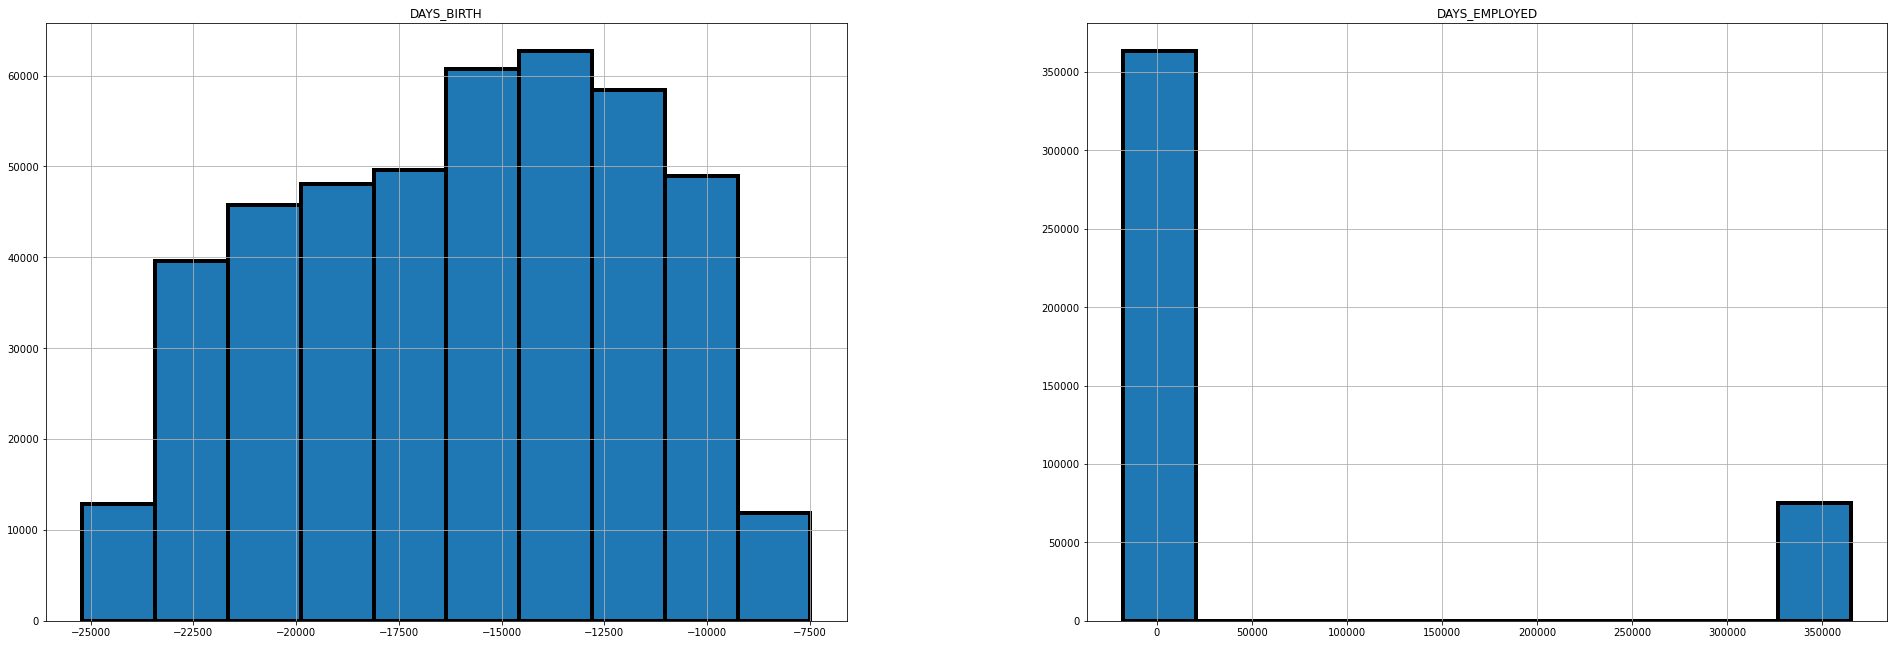

In [10]:
plt.figure(figsize=(8,8))
#I will check children count, total income, age and employment days to see any negative patterns
# these plots are the ones I can check numerically, the others I will have to plot different type of tables
cols_to_plot = ["DAYS_BIRTH","DAYS_EMPLOYED"]
crd_df[cols_to_plot].hist(edgecolor='black', linewidth=4)
dev_check=plt.gcf()
dev_check.set_size_inches(33,11)

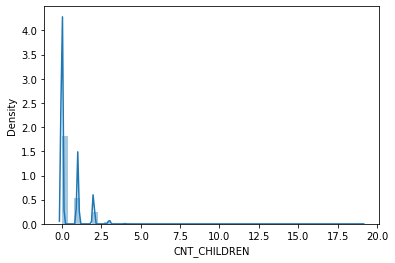

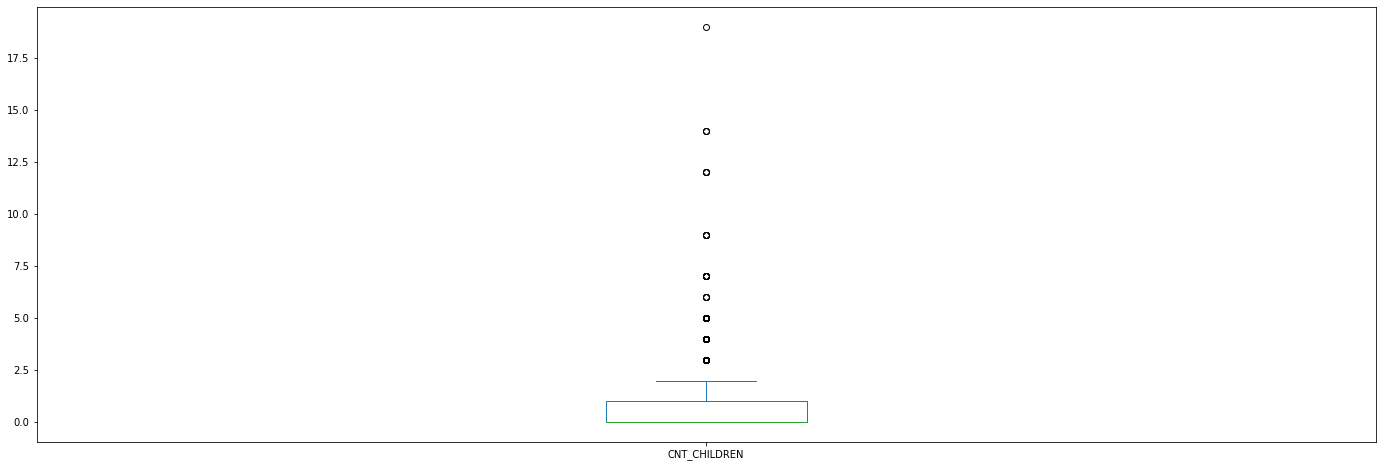

In [11]:
sns.distplot(crd_df["CNT_CHILDREN"])#seaborn distribution plot
plt.show()
crd_df["CNT_CHILDREN"].plot.box(figsize=(24,8))#box plot to show outliners. Outliners are the dots more far away from the boxes
plt.show()

In [12]:
#by the box plot we see some outliners in this category which I will remove later

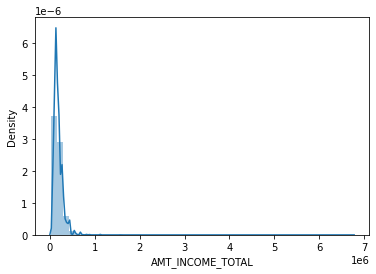

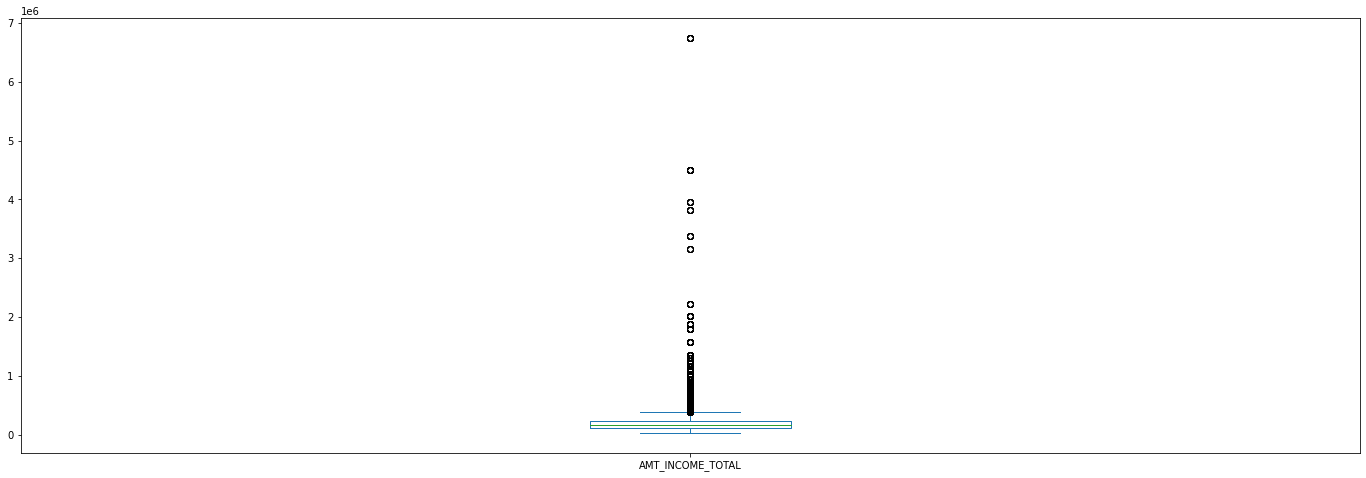

In [13]:
sns.distplot(crd_df["AMT_INCOME_TOTAL"])
plt.show()
crd_df["AMT_INCOME_TOTAL"].plot.box(figsize=(24,8))
plt.show()

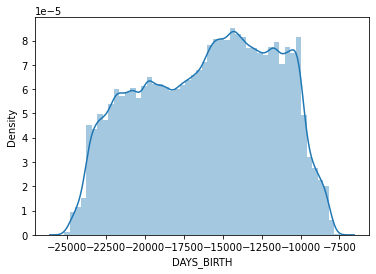

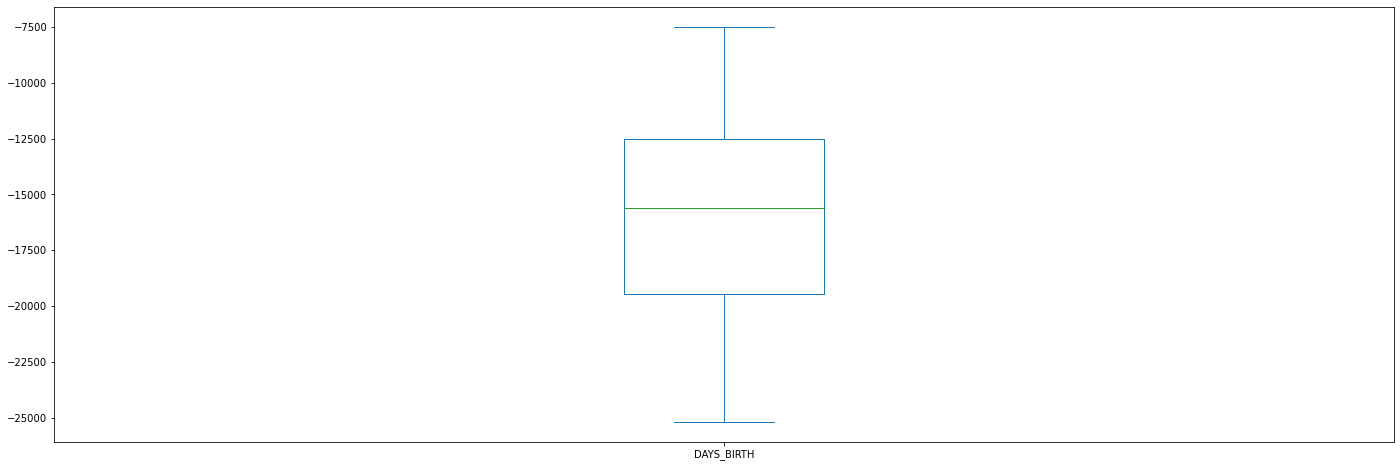

In [14]:
sns.distplot(crd_df["DAYS_BIRTH"])
plt.show()
crd_df["DAYS_BIRTH"].plot.box(figsize=(24,8))
plt.show()

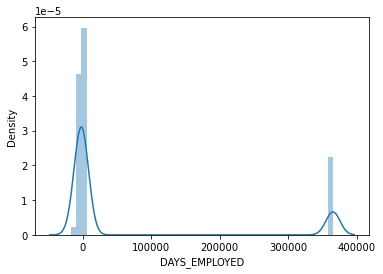

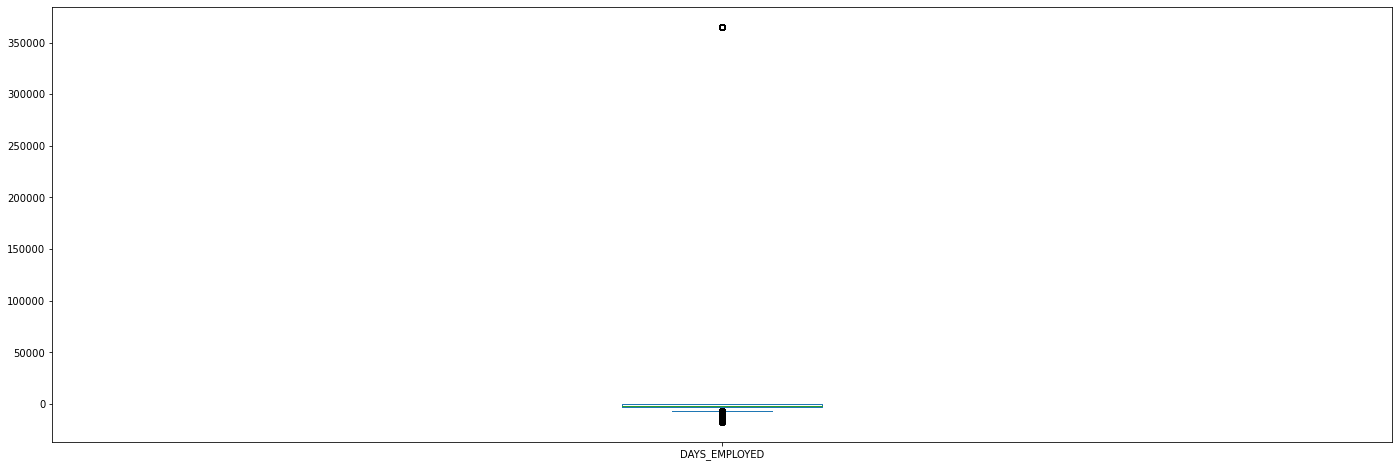

In [15]:
sns.distplot(crd_df["DAYS_EMPLOYED"])
plt.show()
crd_df["DAYS_EMPLOYED"].plot.box(figsize=(24,8))
plt.show()

### Now I see some problems in the number of children data, days employed and total income graphs. We can spot outliners from here. 
### This means I will have to drop some rows with high number of children and the hole employed graph
### I need also to convert days employed and age into years.

# Lets plot the non-numeric value columns
##### I will plot the income type,family status,housing type and education type with hist charts
##### The Gender, car and realty ownerships will be ploted with pie charts because they are Yes/No values, I will try also 1/0 values


<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='count'>

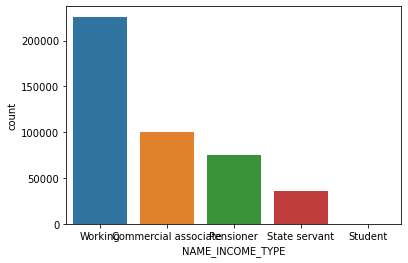

In [16]:
sns.countplot(crd_df['NAME_INCOME_TYPE'])# Similarly, we can visualise the distribution of the numerical variables

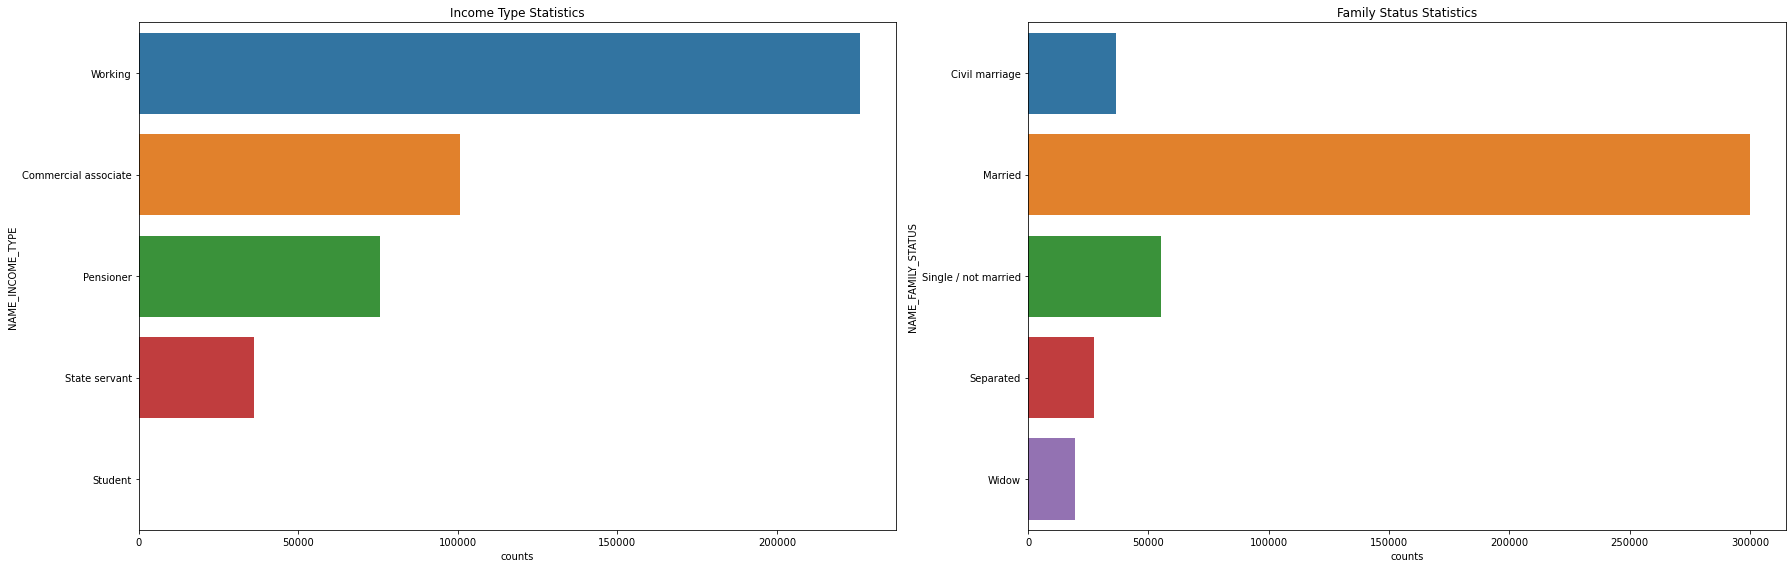

In [17]:
#Income type and family status charts
#I am using counts of theem to see how may entries are in each category
fig, axes = plt.subplots(1,2)

f1=sns.countplot(y=crd_df.NAME_INCOME_TYPE,linewidth=1.5, ax=axes[0])
f1.set_title("Income Type Statistics")
f1.set_xlabel("counts")

f2=sns.countplot(y=crd_df.NAME_FAMILY_STATUS,linewidth=1.5, ax=axes[1])
f2.set_title("Family Status Statistics")
f2.set_xlabel("counts")


fig.set_size_inches(25,8)
plt.tight_layout()
plt.show()

### Student seems to have less importance, but the occupation is a must when have credit approval so we will have to keep it for now

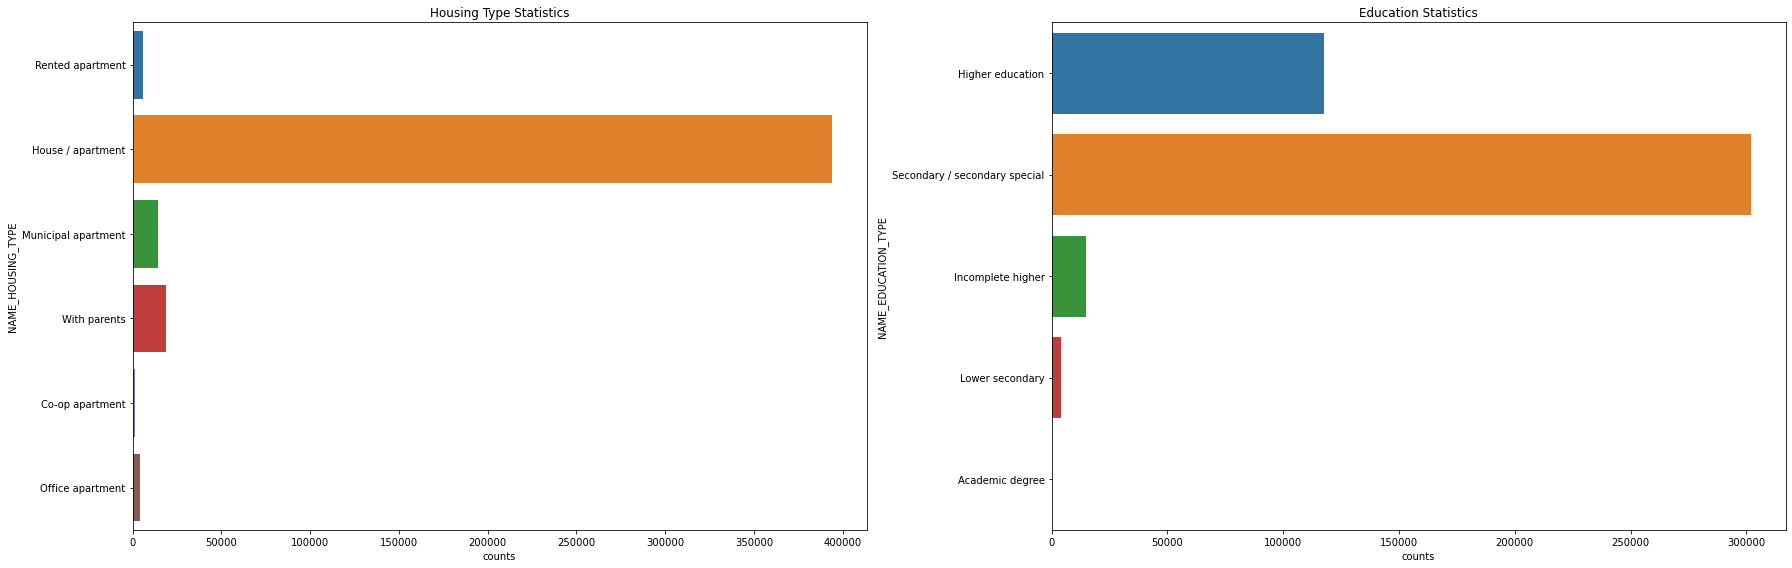

In [18]:
fig, axes = plt.subplots(1,2)

f1= sns.countplot(y=crd_df.NAME_HOUSING_TYPE,linewidth=1.5, ax=axes[0])
f1.set_title("Housing Type Statistics")
f1.set_xlabel("counts")


f2= sns.countplot(y=crd_df.NAME_EDUCATION_TYPE, ax=axes[1])
f2.set_title("Education Statistics")
f2.set_xlabel("counts")

fig.set_size_inches(25,8)

plt.tight_layout()

plt.show()

### Housing type also has a large value of house and apartments, which may effect our learning but we will have to keep it since it is a relevant information for credit check

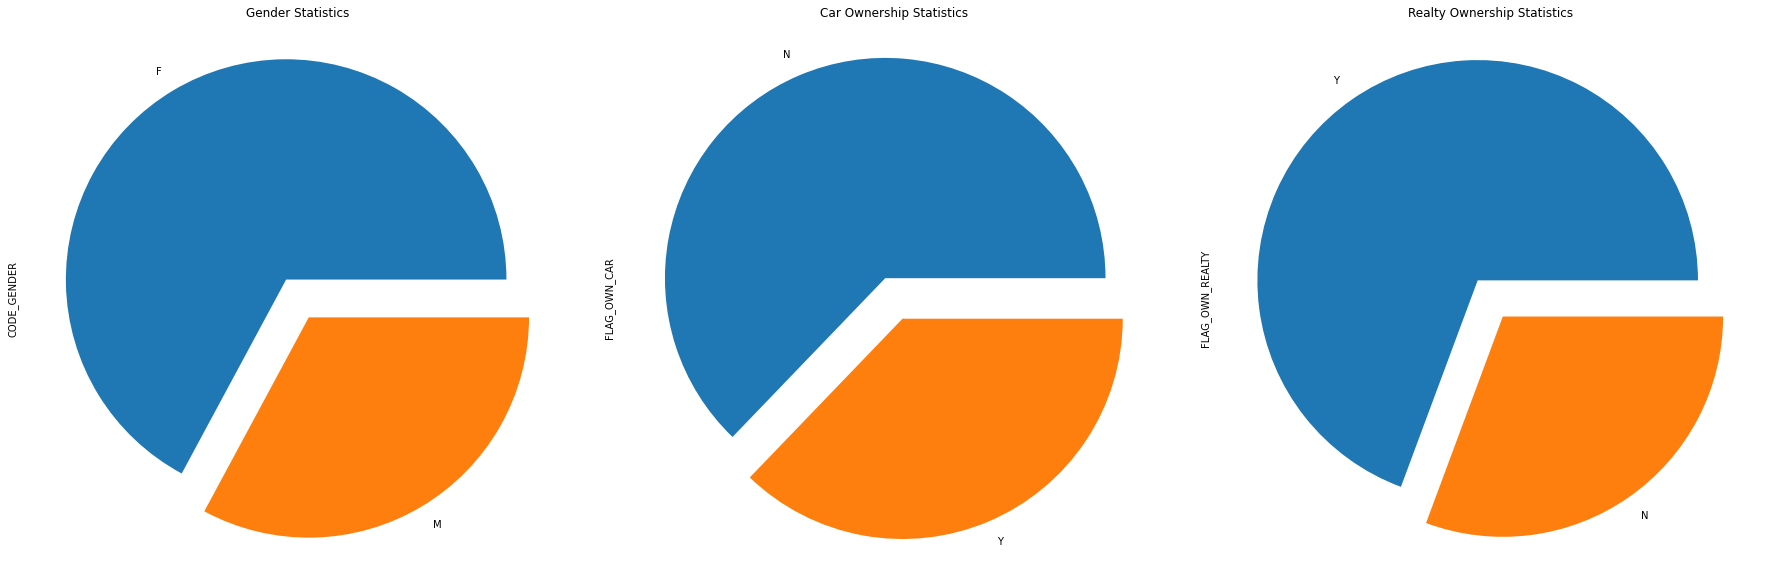

In [19]:
#plot the pie charts for the yes/no value columns
fig, axes = plt.subplots(1,3)

f1= crd_df['CODE_GENDER'].value_counts().plot.pie(explode=[0.1,0.1], ax=axes[0])
f1.set_title("Gender Statistics")

f2= crd_df['FLAG_OWN_CAR'].value_counts().plot.pie(explode=[0.1,0.1], ax=axes[1])
f2.set_title("Car Ownership Statistics")

f3= crd_df['FLAG_OWN_REALTY'].value_counts().plot.pie(explode=[0.1,0.1], ax=axes[2])
f3.set_title("Realty Ownership Statistics")


fig.set_size_inches(25,8)

plt.tight_layout()

plt.show()

In [20]:
crd_df['FLAG_MOBIL'].unique()
#checking the values of mobile phone
#we can see we have only 1 value so it is redundant for our model and we will drop it later.

array([1])

<Figure size 576x576 with 0 Axes>

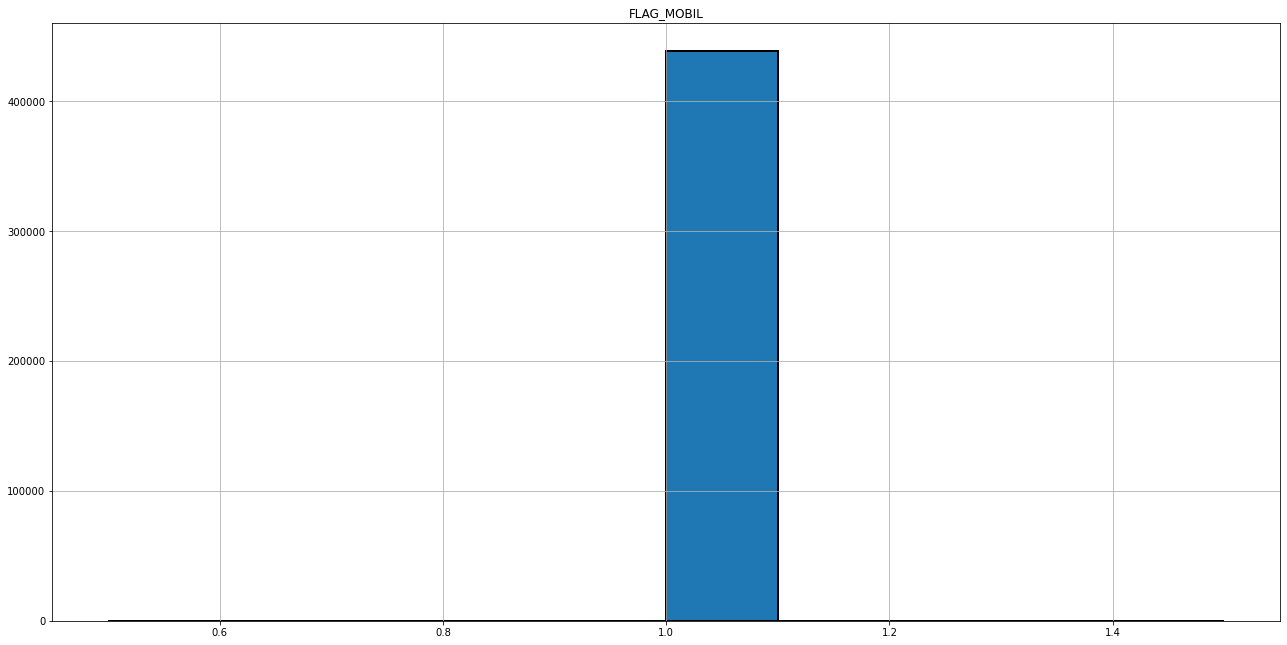

In [21]:
#plot the hist charts to see the 1/0 values also
plt.figure(figsize=(8,8))

cols_to_plot = ["FLAG_MOBIL"]
crd_df[cols_to_plot].hist(edgecolor='black', linewidth=2)
dev_check=plt.gcf()
dev_check.set_size_inches(22,11)

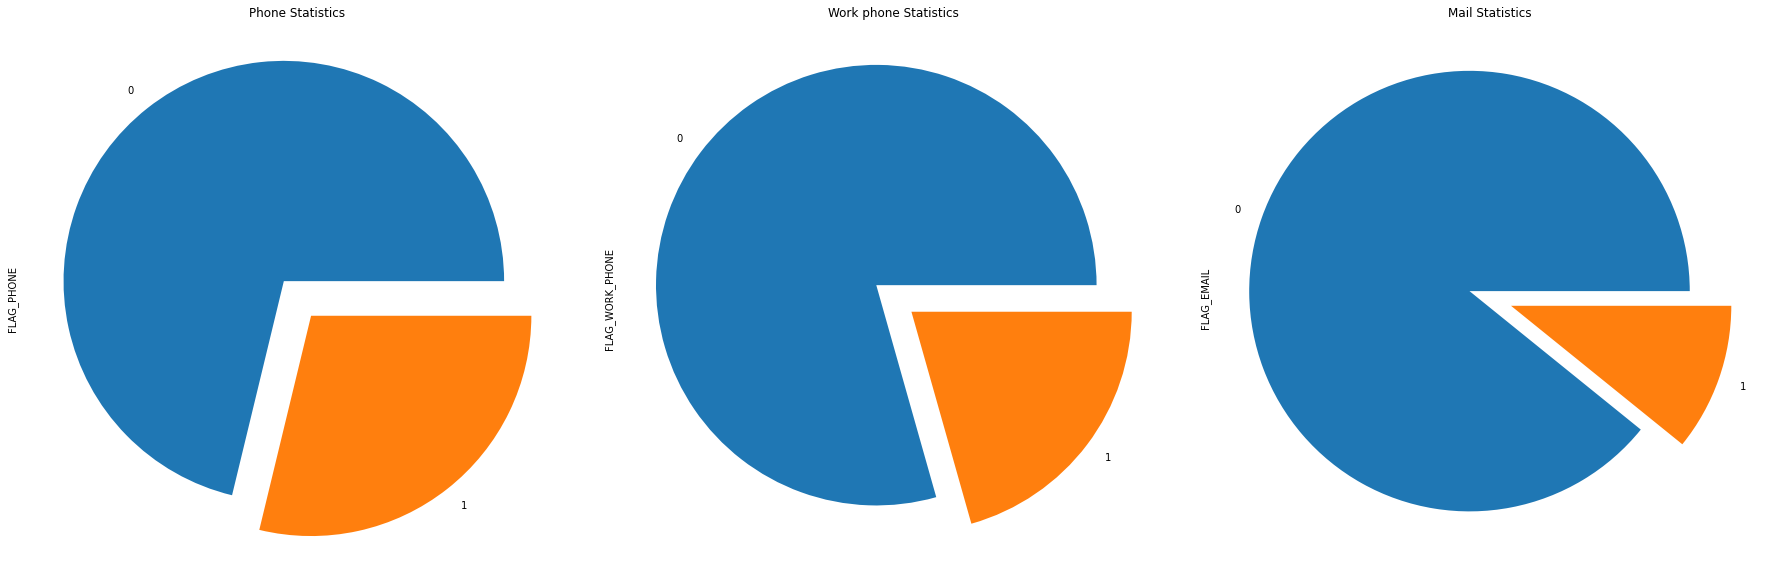

In [22]:
#plot the pie charts for the yes/no value columns
fig, axes = plt.subplots(1,3)

#f1= crd_df['FLAG_MOBIL'].value_counts().plot.pie(explode=[0.1,0.1], ax=axes[0])
#f1.set_title("Mobile Statistics")

f1= crd_df['FLAG_PHONE'].value_counts().plot.pie(explode=[0.1,0.1], ax=axes[0])
f1.set_title("Phone Statistics")

f2= crd_df['FLAG_WORK_PHONE'].value_counts().plot.pie(explode=[0.1,0.1], ax=axes[1])
f2.set_title("Work phone Statistics")

f3= crd_df['FLAG_EMAIL'].value_counts().plot.pie(explode=[0.1,0.1], ax=axes[2])
f3.set_title("Mail Statistics")


fig.set_size_inches(25,8)

plt.tight_layout()

plt.show()

# 3- Pre-processing

## *Converting categorical values to ones and zeros

In [23]:
crd_df['CODE_GENDER'].unique()
#checking the values of gender

array(['M', 'F'], dtype=object)

In [24]:
#replace the values by using a dicionary with new values for previous keys.
#male will be 1 and female 0, this does not matter as we only need to differ
crd_df = crd_df.replace(
                            {'CODE_GENDER' : 
                                 {'M':1, 'F':0}
                            }
                        )
crd_df['FLAG_OWN_REALTY'].unique()

array(['Y', 'N'], dtype=object)

In [25]:
crd_df['FLAG_OWN_CAR'].unique()

array(['Y', 'N'], dtype=object)

In [26]:
crd_df = crd_df.replace(
                            {'FLAG_OWN_CAR' :
                                        {'Y':1,'N':0}
                            }
                        )
crd_df['FLAG_OWN_CAR'].unique()

array([1, 0])

In [27]:
crd_df['FLAG_OWN_REALTY'].unique()

array(['Y', 'N'], dtype=object)

In [28]:
crd_df = crd_df.replace({'FLAG_OWN_REALTY' :
                                            {'Y' : 1,
                                             'N' : 0}})
crd_df['FLAG_OWN_REALTY'].unique()

array([1, 0])

In [29]:
#Education type and Family status have a lot of categories, so I will use an encoder for those.
crd_df['NAME_EDUCATION_TYPE'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [30]:
crd_df['NAME_FAMILY_STATUS'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [31]:
crd_df['CNT_FAM_MEMBERS'].unique()

array([ 2.,  1.,  5.,  3.,  4.,  6., 15.,  7., 20.,  9., 11., 14.,  8.])

In [32]:
crd_df['CNT_FAM_MEMBERS'] = crd_df['CNT_FAM_MEMBERS'].astype(int)
crd_df['CNT_FAM_MEMBERS'].unique()

array([ 2,  1,  5,  3,  4,  6, 15,  7, 20,  9, 11, 14,  8])

## *Converting the number of days format in DAYS_BIRTH and DAYS_EMPLOYED to number of years

In [33]:
# Using pandas timedelta type, this helps me in the conversion of days to years
crd_df['AGE'] = np.ceil(pd.to_timedelta(crd_df['DAYS_BIRTH'], unit='D').dt.days / -365.25)
#lets check the conversion
crd_df['AGE']

0        33.00
1        33.00
2        59.00
3        53.00
4        53.00
          ... 
423317   37.00
426434   35.00
432885   28.00
421225   30.00
424339   44.00
Name: AGE, Length: 438510, dtype: float64

In [34]:
#I need to get rid of values more than 0 wich means they are not working.
#so I will convert them all to 0
crd_df.loc[(crd_df['DAYS_EMPLOYED'] > 0), 'DAYS_EMPLOYED'] = 0

In [35]:
#convert the same way we did with age
crd_df['YEARS_EMPLOYED'] = np.ceil(pd.to_timedelta(crd_df['DAYS_EMPLOYED'], unit='D').dt.days / -365.25)
crd_df['YEARS_EMPLOYED'].unique()

array([13.,  4.,  9., -0.,  3.,  5.,  6., 20., 15., 14.,  8.,  7., 18.,
       30.,  2., 16., 12.,  1., 11., 24., 25., 21., 10., 28., 27., 19.,
       22., 23., 17., 29., 39., 33., 32., 37., 38., 31., 40., 26., 35.,
       34., 42., 41., 36., 44., 43., 45., 48., 46.])

<Figure size 576x576 with 0 Axes>

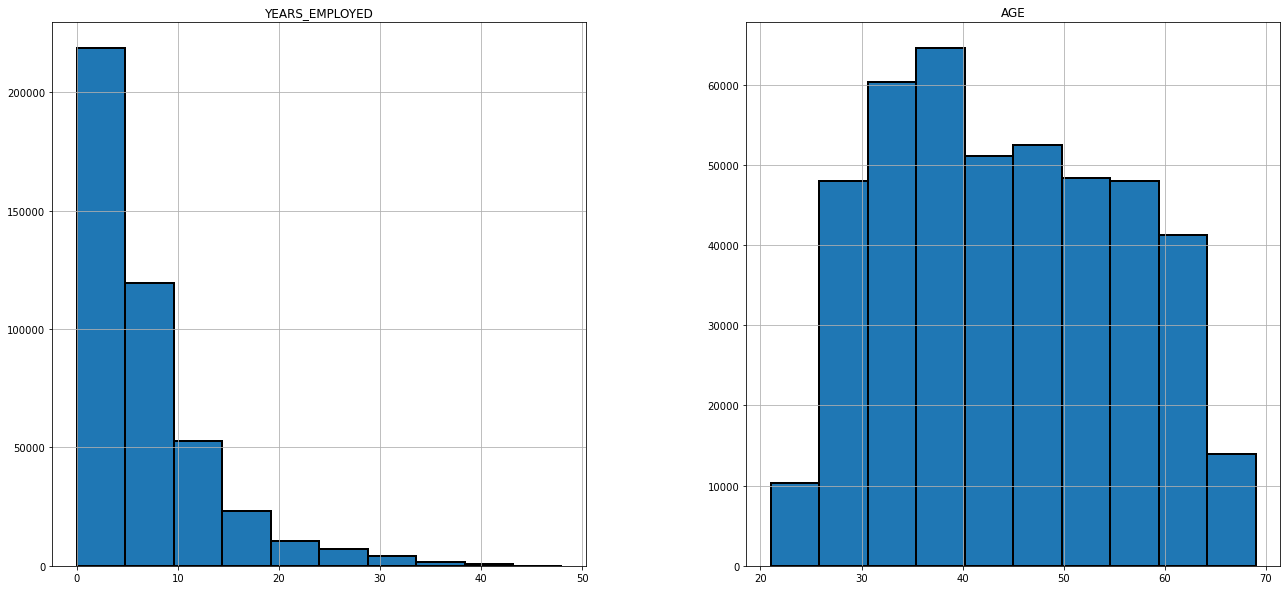

In [36]:
#Lets see their grapghs now
plt.figure(figsize=(8,8))

cols_to_plot = ["YEARS_EMPLOYED","AGE"]
crd_df[cols_to_plot].hist(edgecolor='black', linewidth=2)
dev_check=plt.gcf()
dev_check.set_size_inches(22,10)

## *Calculate the z-scores to see and remove outliners, so values that are far from my mean. 
##### I will do this in 3 columns which seem suspicious by their charts and data and logically. These being number of children, total income and years employed.

In [37]:
def calc_z_score(df, cols):
    for col in cols:
        df[col+"_z_score"] = (df[col] - df[col].mean())/df[col].std()
    return df

crd_df_2 = calc_z_score(crd_df, cols=["CNT_CHILDREN","AMT_INCOME_TOTAL", "YEARS_EMPLOYED"])
                              
print(crd_df_2['CNT_CHILDREN_z_score'])
print(crd_df_2['AMT_INCOME_TOTAL_z_score'])
print(crd_df_2['YEARS_EMPLOYED_z_score'])

0        -0.59
1        -0.59
2        -0.59
3        -0.59
4        -0.59
          ... 
423317   -0.59
426434    2.17
432885   -0.59
421225    0.79
424339    0.79
Name: CNT_CHILDREN_z_score, Length: 438510, dtype: float64
0         2.18
1         2.18
2        -0.68
3         0.75
4         0.75
          ... 
423317   -0.89
426434   -0.48
432885   -0.07
421225   -0.07
424339   -0.27
Name: AMT_INCOME_TOTAL_z_score, Length: 438510, dtype: float64
0         1.00
1         1.00
2        -0.35
3         0.40
4         0.40
          ... 
423317    1.30
426434    0.85
432885   -0.81
421225   -0.66
424339    0.70
Name: YEARS_EMPLOYED_z_score, Length: 438510, dtype: float64


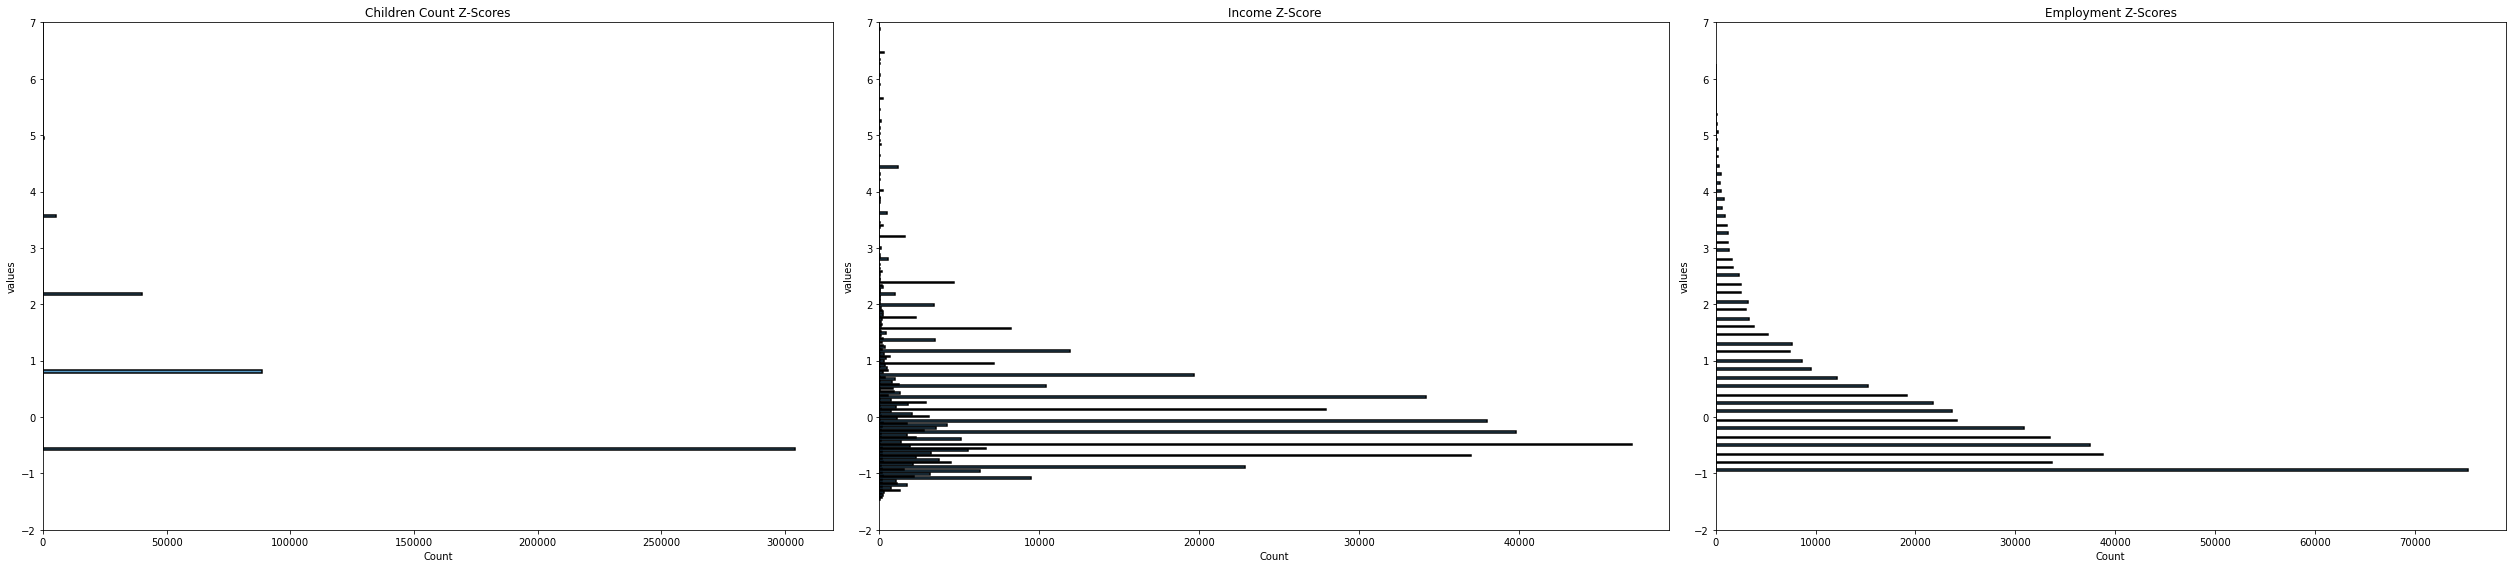

In [38]:
#lets see also their histplots to make a correct assumption of the threshold.
fig, axes = plt.subplots(1,3)

f1=sns.histplot(y=crd_df_2.CNT_CHILDREN_z_score,linewidth=1.5, ax=axes[0])
f1.set_title("Children Count Z-Scores")
f1.set_ylabel("values")
f1.set_xlabel("Count")
f1.set_ylim([-2,7])

f2= sns.histplot(y=crd_df_2.AMT_INCOME_TOTAL_z_score,linewidth=1.5, ax=axes[1])
f2.set_title("Income Z-Score")
f2.set_ylabel("values")
f2.set_ylim([-2,7])

f3= sns.histplot(y=crd_df_2.YEARS_EMPLOYED_z_score,linewidth=1.5, ax=axes[2])
f3.set_title("Employment Z-Scores")
f3.set_ylabel("values")
f3.set_ylim([-2,7])

fig.set_size_inches(35,8)
f1.set_ylim([-2,7])
plt.tight_layout()

plt.show()

In [39]:
#By the data and charts it seem good to use the empirical rule, so I am going to keep the threshold at 3 to get 
#I use 3 filters and apply it to the new df while checking the absolute value of the z-score and making sure the z-score is between -3 and 3.
filter_2 = crd_df_2.CNT_CHILDREN_z_score.abs() <= 3
filter_3 = crd_df_2.AMT_INCOME_TOTAL_z_score.abs() <= 3
filter_4 = crd_df_2.YEARS_EMPLOYED_z_score.abs() <= 3

crd_df_2 = crd_df_2[filter_2 & filter_3 & filter_4]

crd_df_2.drop(columns= ["CNT_CHILDREN_z_score","AMT_INCOME_TOTAL_z_score","YEARS_EMPLOYED_z_score"],inplace=True)

## *Drop null value rows found in OCCUPATION TYPE from the dataframe

In [40]:
crd_clean = crd_df_2[crd_df_2['OCCUPATION_TYPE'].notna()]

In [41]:
crd_clean.count()
#we can see that the rows are unified and we have succesfully dropped the rows

ID                     287950
CODE_GENDER            287950
FLAG_OWN_CAR           287950
FLAG_OWN_REALTY        287950
CNT_CHILDREN           287950
AMT_INCOME_TOTAL       287950
NAME_INCOME_TYPE       287950
NAME_EDUCATION_TYPE    287950
NAME_FAMILY_STATUS     287950
NAME_HOUSING_TYPE      287950
DAYS_BIRTH             287950
DAYS_EMPLOYED          287950
FLAG_MOBIL             287950
FLAG_WORK_PHONE        287950
FLAG_PHONE             287950
FLAG_EMAIL             287950
OCCUPATION_TYPE        287950
CNT_FAM_MEMBERS        287950
AGE                    287950
YEARS_EMPLOYED         287950
dtype: int64

## *Remove Mobile label

In [42]:
crd_df = crd_df.drop(columns=['FLAG_MOBIL'])

## *Renaming columns and dropping redundant features that we already converted

In [43]:
crd_clean = crd_clean.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED'])

In [44]:
#Rename the columns for better view
crd_clean.columns = ['ID', 'Gender', 'Car_Owner', 'Realty_Owner', 'Children', 'Total_Income', 'Income_Type',\
                        'Education_Type', 'Family_Status', 'Housing_Type', 'Mobile_Phone', 'Work_Phone', \
                        'Phone', 'Email', 'Job_Title', 'Family_Members', 'Age', 'Years_Experience' ]

In [45]:
crd_clean.head()

,ID,Gender,Car_Owner,Realty_Owner,Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Mobile_Phone,Work_Phone,Phone,Email,Job_Title,Family_Members,Age,Years_Experience
2,5008806,1,1,1,0,112500.00,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2,59.00,4.00
3,5008808,0,0,1,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,53.00,9.00
4,5008809,0,0,1,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,53.00,9.00
5,5008810,0,0,1,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,53.00,9.00
6,5008811,0,0,1,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,53.00,9.00


# *Loading the second csv and make some preprocessing 

In [46]:
crdr_df = pd.read_csv('credit_record.csv')

In [47]:
crdr_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [48]:
#lets sort it by ID to get inline with the first dataframe.
crdr_df = crdr_df.sort_values('ID')
crdr_df

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
22,5001712,-18,0
...,...,...,...
1048547,5150487,-2,C
1048546,5150487,-1,C
1048545,5150487,0,C
1048558,5150487,-13,C


In [49]:
#I will check the different types of status to classify the data manually
crdr_df['STATUS'].unique()

array(['X', '0', 'C', '1', '3', '2', '4', '5'], dtype=object)

In [50]:
crdr_df['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

# From the information in the dataset I will classify debt as below
#### C, X, 0 with 'Good_Debt' (C: loan for that month is already paid; X: no loan for that month; 0: loan is 1 to 29 days overdue).
#### 1, 2, 3, 4, 5 with 'Bad_Debt' (1: loan is 30 to 59 days overdue; 2: loan is 60 to 89 days overdue; 3: loan is 90 to 119 days overdue; 4: loan is 120 to 149 days overdue; 5: loan is more than 150 days overdue).

In [51]:
crdr_df['STATUS_NEW'] = crdr_df['STATUS']

In [52]:
crdr_df = crdr_df.replace({'STATUS_NEW' :
                                          {'C' : 'Good_Debt',
                                           'X' : 'Good_Debt',
                                           '0' : 'Good_Debt',
                                           '1' : 'Bad_Debt',
                                           '2' : 'Bad_Debt',
                                           '3' : 'Bad_Debt',
                                           '4' : 'Bad_Debt',
                                           '5' : 'Bad_Debt'}})

In [53]:
crdr_df

,ID,MONTHS_BALANCE,STATUS,STATUS_NEW
0,5001711,0,X,Good_Debt
1,5001711,-1,0,Good_Debt
2,5001711,-2,0,Good_Debt
3,5001711,-3,0,Good_Debt
22,5001712,-18,0,Good_Debt
...,...,...,...,...
1048547,5150487,-2,C,Good_Debt
1048546,5150487,-1,C,Good_Debt
1048545,5150487,0,C,Good_Debt
1048558,5150487,-13,C,Good_Debt


In [54]:
crdr_df['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [55]:
# I can see multiple debts for one ID, so I need to compile total number of Bad and Good debts for each client(ID)
crdr_df.value_counts(subset=['ID', 'STATUS_NEW']).unstack(fill_value=0)

STATUS_NEW,Bad_Debt,Good_Debt
ID,,
5001711,0,4
5001712,0,19
5001713,0,22
5001714,0,15
5001715,0,60
...,...,...
5150482,0,18
5150483,0,18
5150484,0,13


## Classify clients according to the number of bad an good debts.

In [56]:
#first I will create and index fo the dataset
res_df = crdr_df.value_counts(subset=['ID', 'STATUS_NEW']).unstack(fill_value=0).reset_index()

In [57]:
res_df

STATUS_NEW,ID,Bad_Debt,Good_Debt
0,5001711,0,4
1,5001712,0,19
2,5001713,0,22
3,5001714,0,15
4,5001715,0,60
...,...,...,...
45980,5150482,0,18
45981,5150483,0,18
45982,5150484,0,13
45983,5150485,0,2


In [58]:
#For the comparison I am building an user facilitator function, which means I will approve those with same good and bad depts and reject those with more bad debts than good.
res_df.loc[(res_df['Good_Debt'] >= res_df['Bad_Debt']), 'Status'] = 1
res_df.loc[(res_df['Good_Debt'] < res_df['Bad_Debt']), 'Status'] = 0
res_df['Status'] = res_df['Status'].astype(int)

In [59]:
res_df.tail()

STATUS_NEW,ID,Bad_Debt,Good_Debt,Status
45980,5150482,0,18,1
45981,5150483,0,18,1
45982,5150484,0,13,1
45983,5150485,0,2,1
45984,5150487,0,30,1


In [60]:
res_df['Status'].value_counts()

1    45847
0      138
Name: Status, dtype: int64

# Merge the Results with the first df by ID

In [61]:
df = crd_clean.merge(res_df, how='inner', on=['ID'])

In [62]:
df.head()

,ID,Gender,Car_Owner,Realty_Owner,Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Work_Phone,Phone,Email,Job_Title,Family_Members,Age,Years_Experience,Bad_Debt,Good_Debt,Status
0,5008806,1,1,1,0,112500.00,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2,59.00,4.00,0,30,1
1,5008808,0,0,1,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1,53.00,9.00,0,5,1
2,5008809,0,0,1,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1,53.00,9.00,0,5,1
3,5008810,0,0,1,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1,53.00,9.00,0,27,1
4,5008811,0,0,1,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1,53.00,9.00,0,39,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23906 entries, 0 to 23905
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                23906 non-null  int64  
 1   Gender            23906 non-null  int64  
 2   Car_Owner         23906 non-null  int64  
 3   Realty_Owner      23906 non-null  int64  
 4   Children          23906 non-null  int64  
 5   Total_Income      23906 non-null  float64
 6   Income_Type       23906 non-null  object 
 7   Education_Type    23906 non-null  object 
 8   Family_Status     23906 non-null  object 
 9   Housing_Type      23906 non-null  object 
 10  Mobile_Phone      23906 non-null  int64  
 11  Work_Phone        23906 non-null  int64  
 12  Phone             23906 non-null  int64  
 13  Email             23906 non-null  int64  
 14  Job_Title         23906 non-null  object 
 15  Family_Members    23906 non-null  int64  
 16  Age               23906 non-null  float6

In [64]:
df = df.drop(columns=['Mobile_Phone'])

In [65]:
df['Status'].value_counts()

1    23824
0       82
Name: Status, dtype: int64

In [66]:
# create lists of numerical and categorical variables to use for graphs
catg_vars = [var for var in df.columns if var != 'Status' and df[var].dtype=='O']
num_vars = [var for var in df.columns if var != 'Status' and var not in catg_vars]

print('Number of categorical variables: {}'.format(len(catg_vars)))
print('Number of numerical variables: {}'.format(len(num_vars)))

Number of categorical variables: 5
Number of numerical variables: 14


In [67]:
#create a no group and yes group dataframes to see all the distribution of the other labels corresponding to each category.
yes_gr = df[df['Status']==1]
no_gr = df[df['Status']==0]

print("group_yes' data shape: {}".format(yes_gr.shape))
print("group_no's data shape: {}".format(no_gr.shape))

group_yes' data shape: (23824, 20)
group_no's data shape: (82, 20)


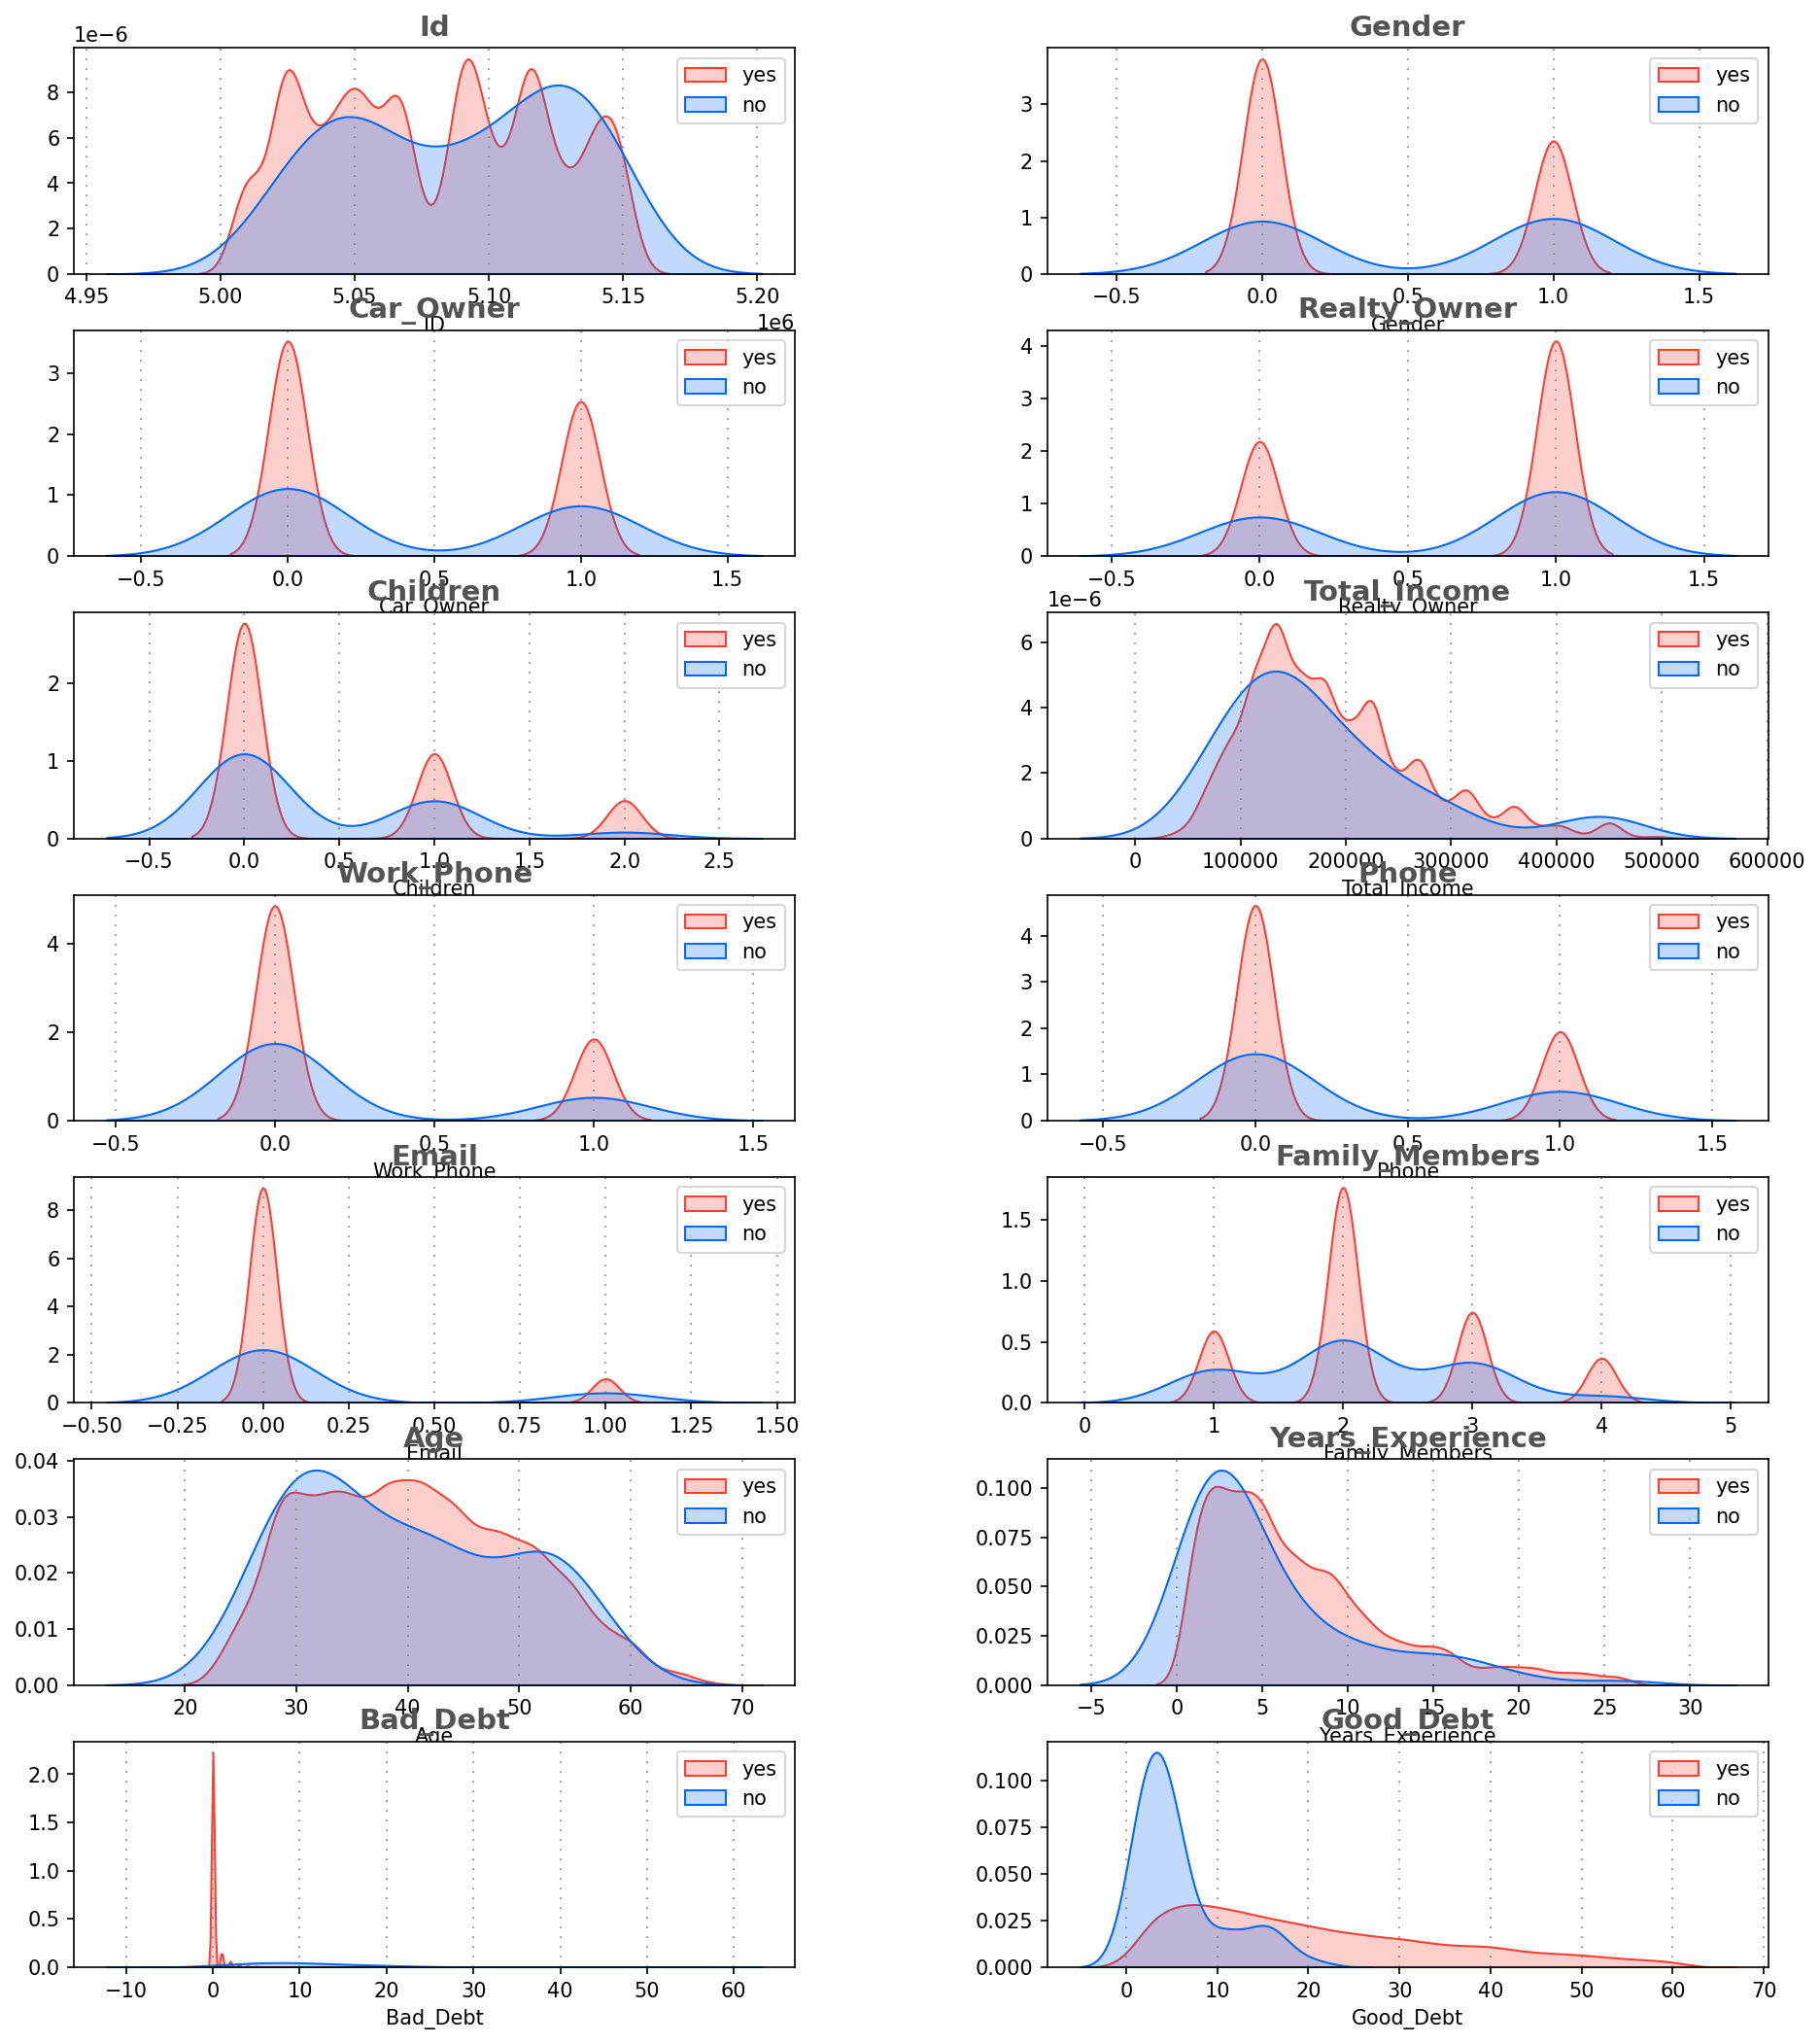

In [68]:
#Lets plot firs the numerical values
background_color = '#ffffff'

fig = plt.figure(figsize=(15,20), dpi=150)
fig.patch.set_facecolor(background_color) # set up background color
gs = fig.add_gridspec(8, 2)
gs.update(wspace=0.35, hspace=0.25)

# axes as a list
axes = [fig.add_subplot(gs[0,0]),
       fig.add_subplot(gs[0,1]),
       fig.add_subplot(gs[1,0]),
       fig.add_subplot(gs[1,1]),
       fig.add_subplot(gs[2,0]),
       fig.add_subplot(gs[2,1]),
       fig.add_subplot(gs[3,0]),
       fig.add_subplot(gs[3,1]),
       fig.add_subplot(gs[4,0]),
       fig.add_subplot(gs[4,1]),
       fig.add_subplot(gs[5,0]),
       fig.add_subplot(gs[5,1]),
       fig.add_subplot(gs[6,0]),
       fig.add_subplot(gs[6,1])]

#Function to create hist plots
def HistPlot(df, var, ax):    
    # create histograms
    sns.kdeplot(yes_gr[var], ax=ax, color='#FA4035', shade=True, label='yes')
    sns.kdeplot(no_gr[var], ax=ax, color='#0569f5', shade=True, label='no')
    ax.grid(which='major', color='gray', linestyle=':', axis='x', zorder=0, dashes=(1,5))
    ax.set_title(f'{var}'.title(), fontsize=14, fontweight='bold', 
                fontfamily='DejaVu Sans', color='#535353', loc='center')
    ax.legend(loc=1)
    ax.set_ylabel('')
    

for ax, var in zip(axes, num_vars):
    HistPlot(df, var, ax)
    

In [69]:
# visuzalitions libraries
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
def barPerc(df, variable, ax):
    """ 
    source: https://stackoverflow.com/a/67076347/4852724
    
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable
        ax: Axes object (for Seaborn Countplot/Bar plot or
                             pandas bar plot)
    """
    
    # 1. How many X categories
    ## check for NaN and remove
    numX = len([x for x in df[variable].unique() if x==x])
    
    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##     [0, 8, 16, 24] are hue bars for 1st X category
        hueBars = bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])
        
        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                   bar.get_height() - 0.1 * bar.get_height(),
                   f"{bar.get_height()/total:.2%}",
                   ha='center', va='top', color='black')

def GrpSubplot(df, variable, ax, axis=None, ticklabels=None):
    """ Create subplots based on X variables"""
    
    df.groupby([variable, target]).size().unstack(target).apply(lambda x: x*100/x.sum(), axis=axis).plot.bar(rot=0,
                                                                                                            width=0.9,
                                                                                                             alpha=0.65,
                                                                                                            color=['#67a9cf','#FA4035'],
                                                                                                            ax=ax);
    ax.set_title(f'{variable}'.title(), fontsize=14, fontweight='bold', fontfamily='serif', color='#323232', loc='left')
    ax.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    ax.set_xticklabels(ticklabels, rotation=90)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.yaxis.set_major_locator(mtick.MultipleLocator(10))
    ax.legend(loc=1)
    ax.set_xlabel('')
    
    barPerc(df, variable, ax)

In [70]:
df['Education_Type'].unique()

#Income_Type	Education_Type	Family_Status	Housing_Type	...	Work_Phone	Phone	Email	Job_Title

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [71]:
df['Family_Status'].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow'], dtype=object)

In [72]:
df['Housing_Type'].unique()

array(['House / apartment', 'Rented apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [73]:
df['Income_Type'].unique()

array(['Working', 'Commercial associate', 'State servant', 'Student',
       'Pensioner'], dtype=object)

In [74]:
df['Job_Title'].unique()

array(['Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

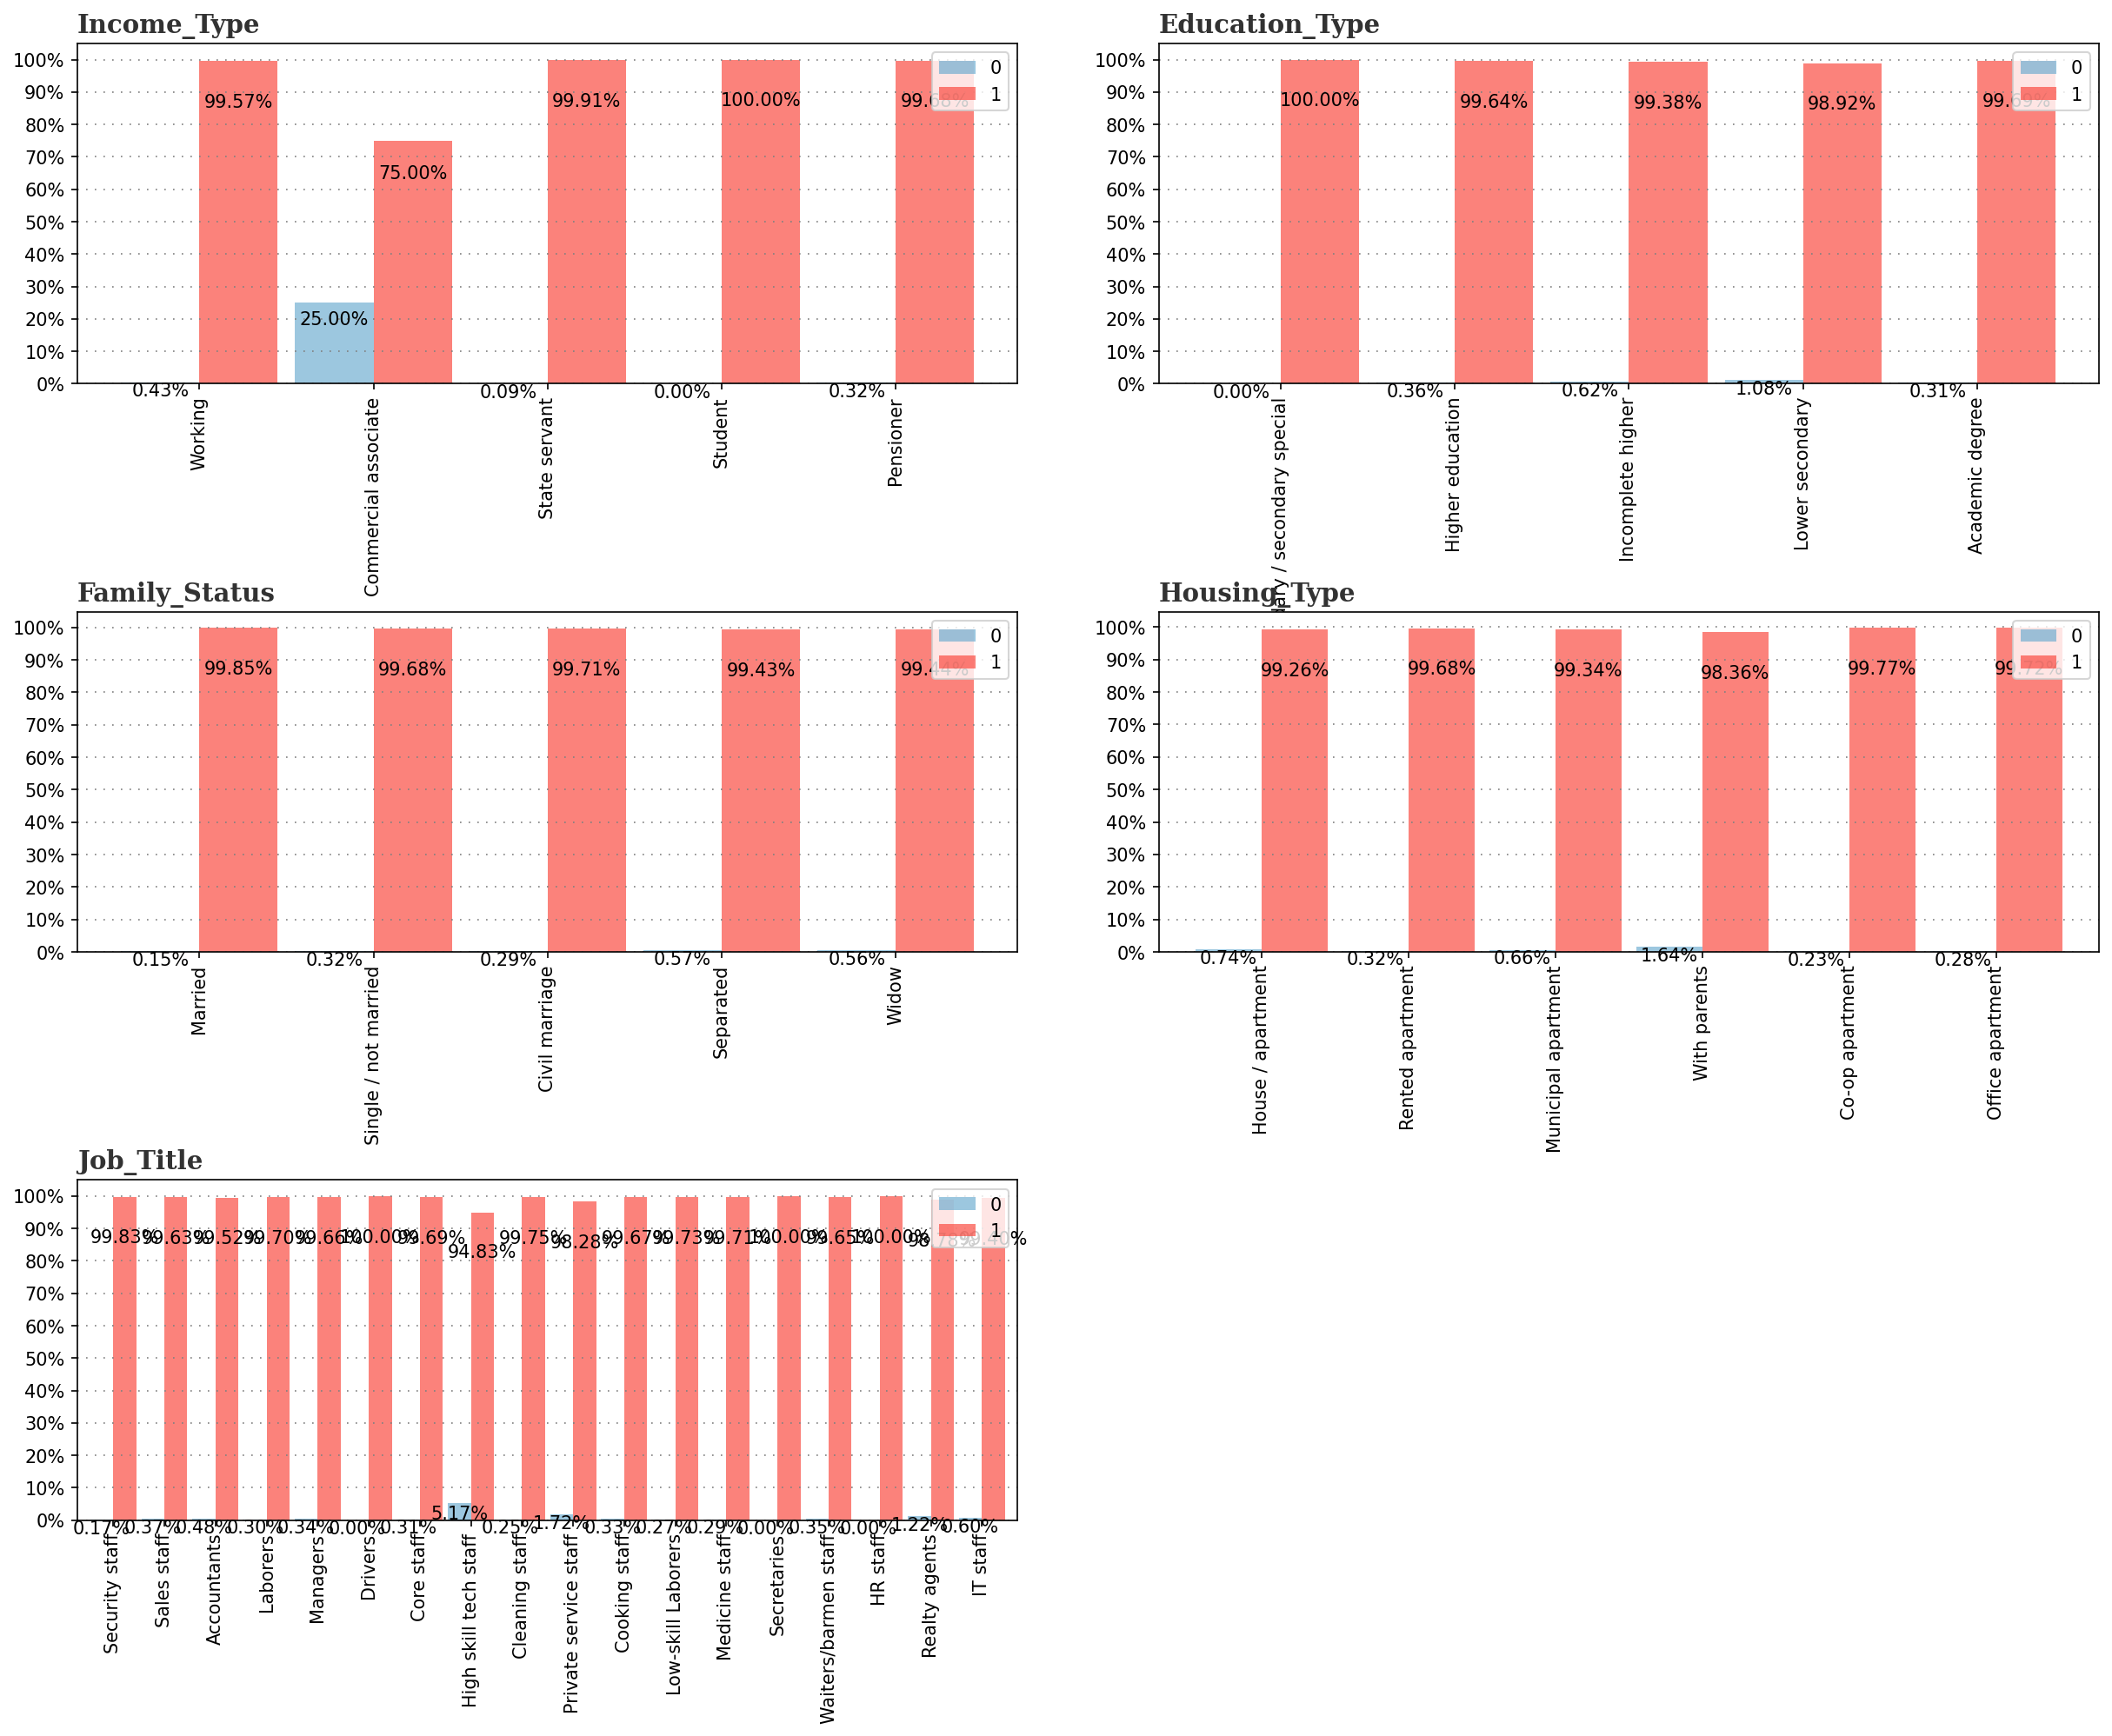

In [75]:
fig = plt.figure(figsize=(20, 15), dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(3, 2)
gs.update(wspace=0.15, hspace=0.67)

# axes as a list
axes = [fig.add_subplot(gs[0,0]),
       fig.add_subplot(gs[0,1]),
       fig.add_subplot(gs[1,0]),
       fig.add_subplot(gs[1,1]),
       fig.add_subplot(gs[2,0])]
#Income_Type	Education_Type	Family_Status	Housing_Type	...	Work_Phone	Phone	Email	Job_Title
# ticklabels as list enterend manually, time consuption to build a function for this.
tlabs = [['Working', 'Commercial associate', 'State servant', 'Student',
       'Pensioner']] + [['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree']] + [['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow']] + [['House / apartment', 'Rented apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment']] + [['Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff']]*2 

target = 'Status'       
for ax, variable, ticklabels in zip(axes, catg_vars, tlabs):
    GrpSubplot(df, variable, ax, axis=1, ticklabels=ticklabels)
    

In [76]:
# Now I will convert all values that are string into categories and give them numerical values.  Income_Type, Education_Type, Family_Status, Housing_Type, Job_Title
df['Income_Type'] = df['Income_Type'].astype('category')
df['Income_Type'] = df['Income_Type'].cat.codes
df['Education_Type'] = df['Education_Type'].astype('category')
df['Education_Type'] = df['Education_Type'].cat.codes
df['Family_Status'] = df['Family_Status'].astype('category')
df['Family_Status'] = df['Family_Status'].cat.codes
df['Housing_Type'] = df['Housing_Type'].astype('category')
df['Housing_Type'] = df['Housing_Type'].cat.codes
df['Job_Title'] = df['Job_Title'].astype('category')
df['Job_Title'] = df['Job_Title'].cat.codes

In [77]:
df.head()

,ID,Gender,Car_Owner,Realty_Owner,Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Work_Phone,Phone,Email,Job_Title,Family_Members,Age,Years_Experience,Bad_Debt,Good_Debt,Status
0,5008806,1,1,1,0,112500.00,4,4,1,1,0,0,0,16,2,59.00,4.00,0,30,1
1,5008808,0,0,1,0,270000.00,0,4,3,1,0,1,1,14,1,53.00,9.00,0,5,1
2,5008809,0,0,1,0,270000.00,0,4,3,1,0,1,1,14,1,53.00,9.00,0,5,1
3,5008810,0,0,1,0,270000.00,0,4,3,1,0,1,1,14,1,53.00,9.00,0,27,1
4,5008811,0,0,1,0,270000.00,0,4,3,1,0,1,1,14,1,53.00,9.00,0,39,1


<AxesSubplot:>

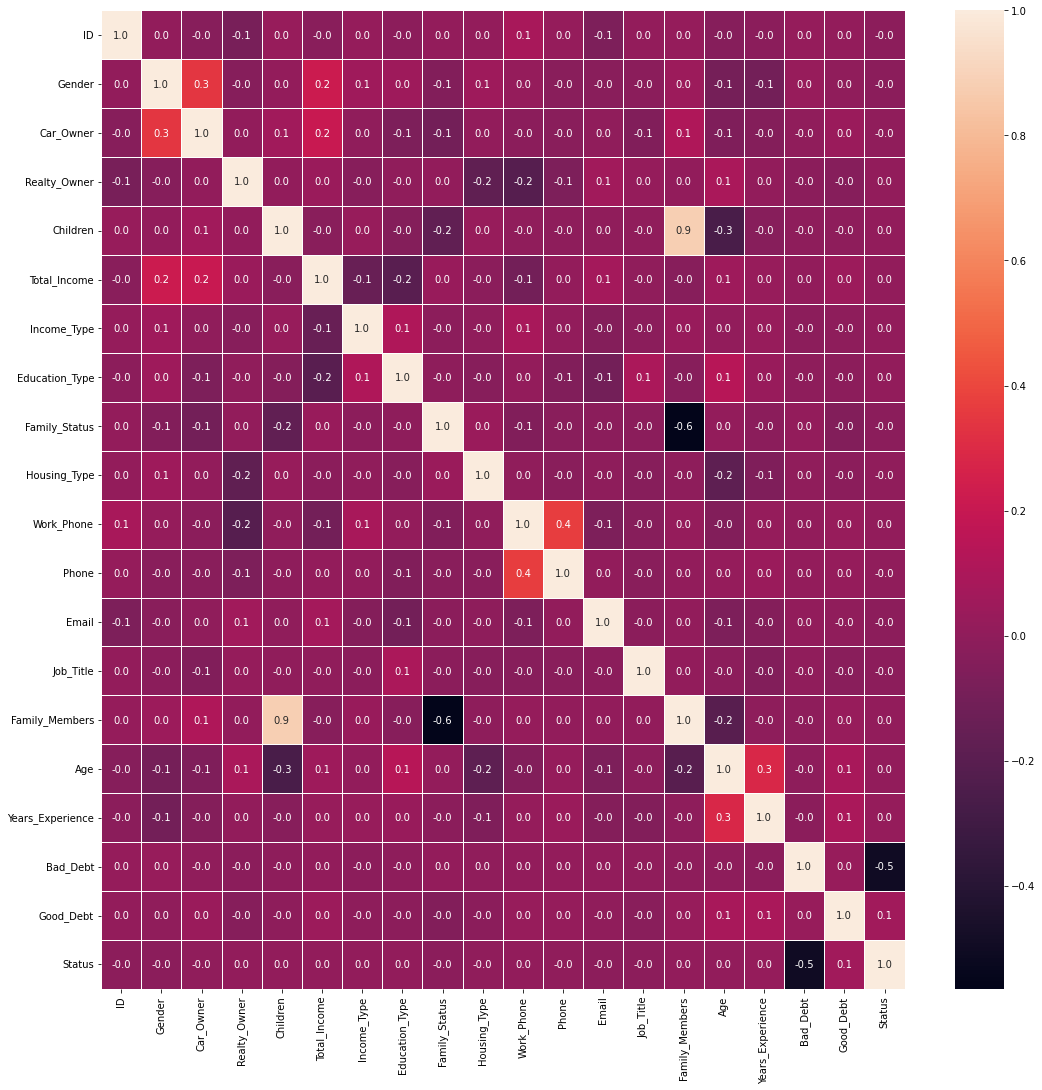

In [78]:
#correlation map to see if we have correlating features
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [79]:
# From the heatmap we can see that family members and children are correlating. so we will use only children since family members have also a bit of correlation with family status.
df=df.drop(columns=['Family_Members','Good_Debt','Bad_Debt'])
# I will drop also the good debt and bad debt columns since I used those to get the status results it is not sane keeping them.

<AxesSubplot:>

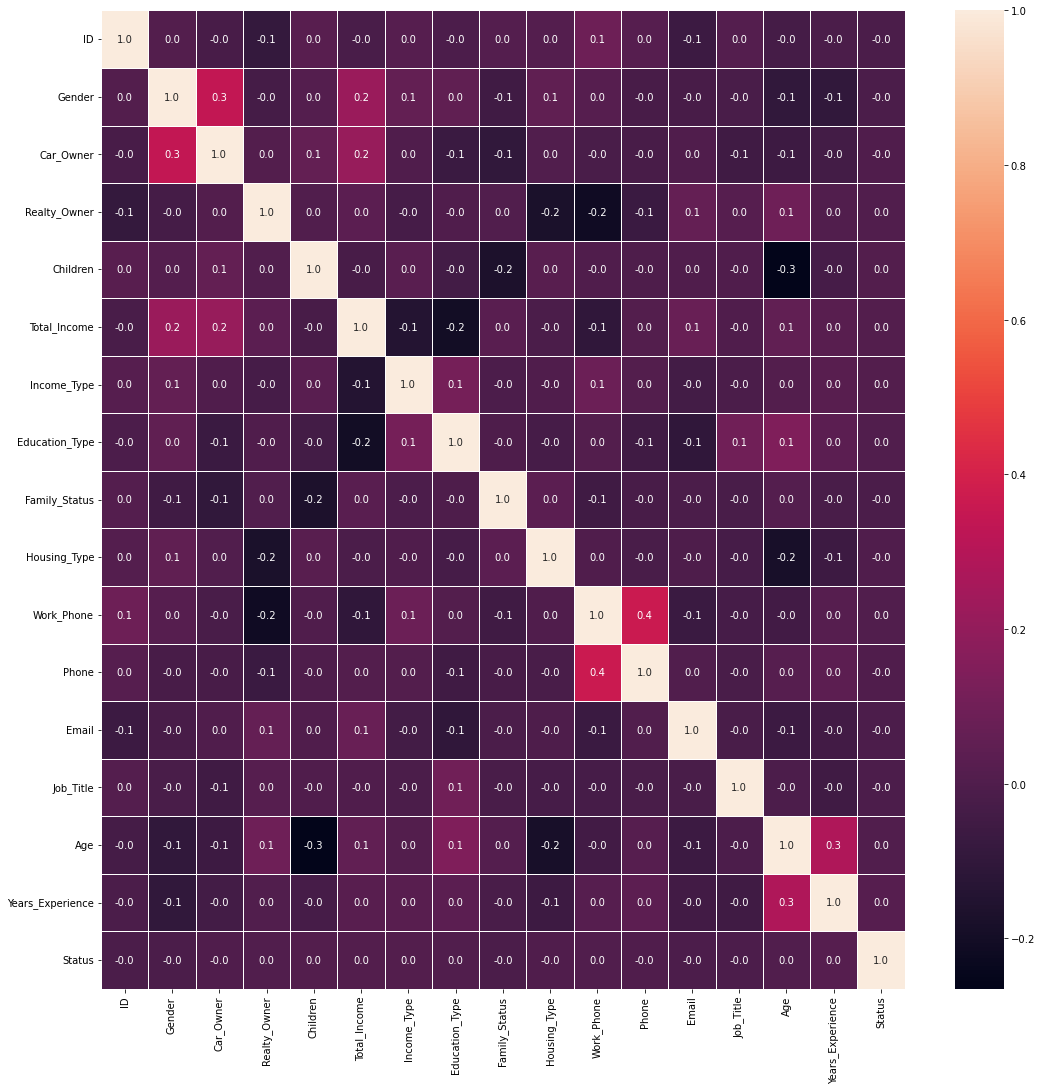

In [80]:
#correlation map to see if we have correlating features

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# 4- Cross-Validation

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import itertools
#remove Status and ID for X.
X = df.drop(columns=['Status','ID'])
y = df.Status 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [82]:
!pip install imblearn

# 5- Traininng and testing

In [83]:
#Just the ConfusionMatrix visualization taken from another source.
def vis_conf_mat(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# 6.1- Logistic Regression

Accuracy Score is 0.99679
   0     1
0  0    23
1  0  7149
[[   0   23]
 [   0 7149]]


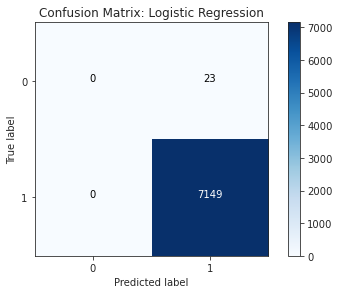

In [84]:
#for simple cross-validation
model = LogisticRegression(C=0.8, penalty='l2', random_state=0, solver='lbfgs')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('ticks') 
class_names = ['0','1']

vis_conf_mat(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = False, 
                      title='Confusion Matrix: Logistic Regression')

In [85]:
f1_score(y_test, y_predict, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

0.9983939669017526

# 6.2- DecisionTreeClassifier

Accuracy Score is 0.9947
    0     1
0   2    21
1  17  7132
[[   2   21]
 [  17 7132]]


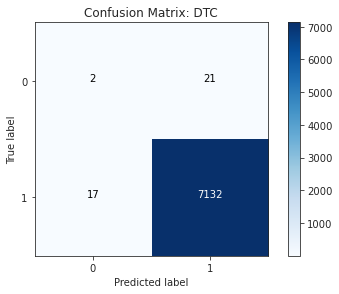

In [86]:
model2 = DecisionTreeClassifier(max_depth=12, min_samples_split=8, random_state=1024)
model2.fit(X_train, y_train)
y_predict = model2.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

vis_conf_mat(confusion_matrix(y_test,y_predict),
                      classes=class_names, normalize = False, 
                      title='Confusion Matrix: DTC')

In [87]:
f1_score(y_test, y_predict, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

0.9973430289470004

# Since my models are overfitting I am trying a SMOTE oversampling technique
# EXTRA This is extra and not included in the Coursework. 

In [88]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 16675
Before OverSampling, counts of label '0': 59 

After OverSampling, the shape of train_X: (33350, 15)
After OverSampling, the shape of train_y: (33350,) 

After OverSampling, counts of label '1': 16675
After OverSampling, counts of label '0': 16675


In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

In [90]:
clf.best_params_

{'C': 1.0}

In [91]:
lr1 = LogisticRegression(C=1,penalty='none', verbose=5)
lr1.fit(X_train_res, y_train_res.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

 L =  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00

X0 =  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00

 U =  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.31165D+04    |proj g|=  4.22682D+07


ITERATION     1

---------------- CAUCHY entered-------------------
 There are            0   breakpoints 

 GCP found in this segment
Piece     

 This problem is unconstrained.


 LINE SEARCH           3  times; norm of step =    1.1688637189698825E-007

At iterate    1    f=  2.31139D+04    |proj g|=  1.54261D+06

 X =  1.9675D-12  4.3637D-12  6.4336D-12  7.9988D-12  1.1689D-07  1.4828D-11
      1.2712D-11 -1.5348D-12  1.3896D-12  4.2268D-12  2.8843D-12  1.7546D-12
     -5.9483D-12  1.6459D-11  3.9211D-11  0.0000D+00

 G = -6.3642D+02 -1.5115D+03 -2.2339D+03 -2.8381D+03 -1.5426D+06 -4.9613D+03
     -4.1130D+03  8.0508D+02 -2.6897D+02 -1.4989D+03 -1.0032D+03 -6.2079D+02
      3.5246D+03  1.2718D+03 -1.3057D+04  1.8045D+02


ITERATION     2

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    4.4277149121571538E-009

At iterate    2    f=  2.31139D+04    |proj g|=  1.30146D+04

 X =  3.8605D-12  8.8598D-12  1.3079D-11  1.6441D-11  1.2131D-07  2.9585D-11
      2.4946D-11 -3.9308D-12  2.1888D-12  8.6857D-12  5.8686D-12  3.6013D-12
     -1.6439D-11  1.2647D-11  7.8049D-

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s finished


LogisticRegression(C=1, penalty='none', verbose=5)

In [92]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 55.592203898050975%


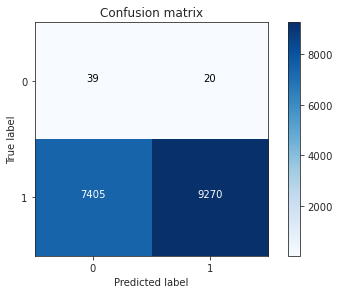

In [93]:
y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 55.5881941530284%


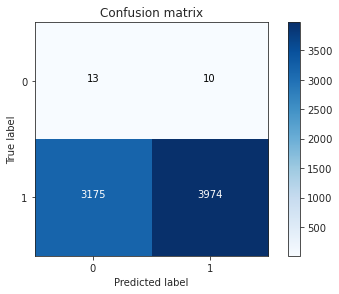

In [94]:
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [95]:
tmp = lr1.fit(X_train_res, y_train_res.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

 L =  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00

X0 =  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00

 U =  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.31165D+04    |proj g|=  4.22682D+07


ITERATION     1

---------------- CAUCHY entered-------------------
 There are            0   breakpoints 

 GCP found in this segment
Piece     

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s finished


 LINE SEARCH           0  times; norm of step =    2.5831880621849152E-007

At iterate   24    f=  2.23193D+04    |proj g|=  9.39630D+03

 X =  4.2461D-03  1.0113D-02  1.4947D-02  1.9006D-02 -3.2234D-07  3.3148D-02
      2.7441D-02 -5.4590D-03  1.7433D-03  1.0038D-02  6.7134D-03  4.1569D-03
     -2.3970D-02 -1.0357D-02  8.7221D-02 -1.2552D-03

 G = -6.4784D+02 -1.3079D+03 -1.9207D+03 -2.4206D+03  2.7460D+03 -3.0207D+03
     -2.4992D+03  7.7912D+02  2.2846D+02 -1.3365D+03 -9.6042D+02 -6.2020D+02
      1.5516D+03  9.3963D+03  4.8234D+03  3.9088D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     24     32      1 

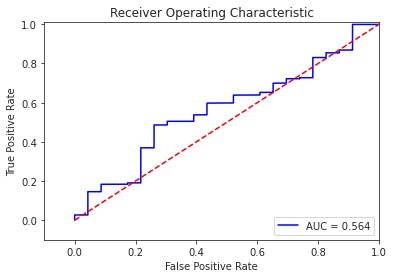

In [96]:
y_pred_sample_score = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Even with SMOTE oversampling the model is not performing well

# 7- Best features with SelectKBest

In [97]:
# Lets see if the selected features are the best
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# find best scored 5 features
selector = SelectKBest(chi2, k=5).fit(X_train, y_train)

In [98]:
print('Score list:', selector.scores_)
print('Feature list:', X_train.columns)

Score list: [1.77334941e+00 2.15334793e-01 3.38194460e-01 2.34851253e+00
 6.01593589e+02 1.82976536e+00 1.34056848e+00 4.33055719e+00
 5.12877141e-01 9.49605496e-02 4.83232373e-01 2.57547465e+00
 2.56887071e+00 1.76578254e+00 2.60111565e+01]
Feature list: Index(['Gender', 'Car_Owner', 'Realty_Owner', 'Children', 'Total_Income',
       'Income_Type', 'Education_Type', 'Family_Status', 'Housing_Type',
       'Work_Phone', 'Phone', 'Email', 'Job_Title', 'Age', 'Years_Experience'],
      dtype='object')


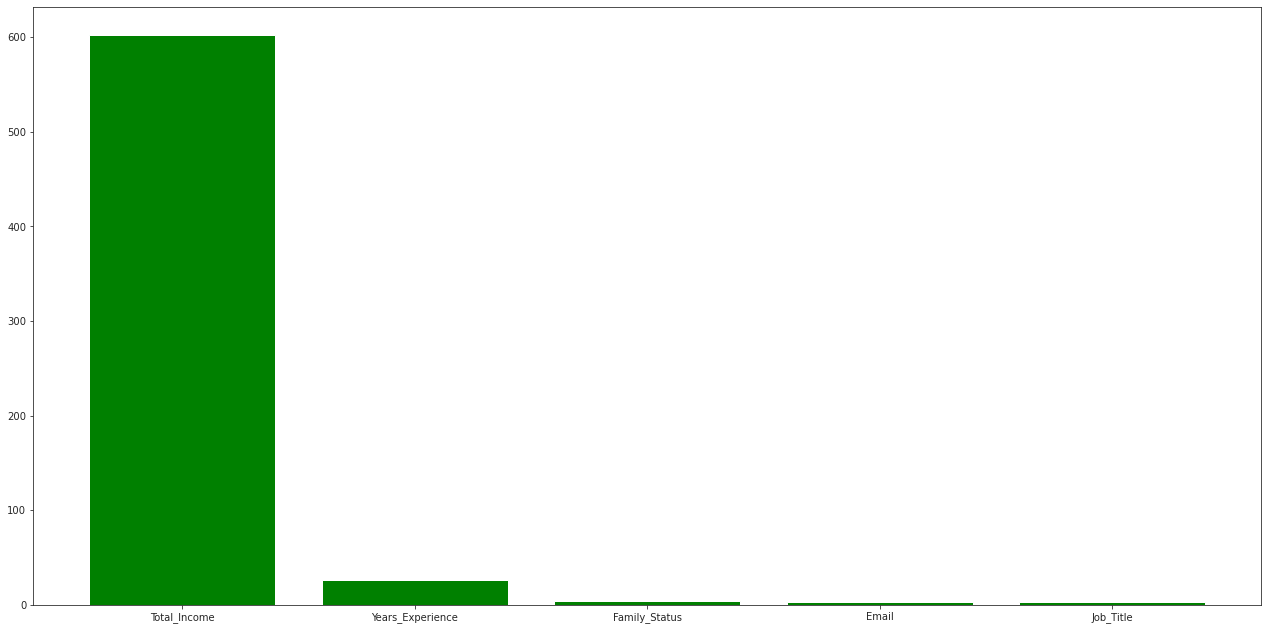

In [99]:
indices = np.argsort(selector.scores_)[::-1]

# To get your top 5 feature names
features = []
for i in range(5):
    features.append(X_train.columns[indices[i]])

# Now plot
plt.figure()
plt.bar(features, selector.scores_[indices[range(5)]], color='g')
dev_check=plt.gcf()
dev_check.set_size_inches(22,11)
plt.show()


In [100]:
cols = selector.get_support(indices=True)
features_df_new = X_train.iloc[:,cols]

In [101]:
features_df_new

,Total_Income,Family_Status,Email,Job_Title,Years_Experience
8929,63000.00,1,0,6,5.00
9621,180000.00,1,0,8,11.00
8891,157500.00,1,1,3,2.00
4585,202500.00,0,0,8,6.00
17194,270000.00,1,0,8,4.00
...,...,...,...,...,...
21575,166500.00,1,0,11,16.00
5390,157500.00,0,0,4,4.00
860,180000.00,1,0,14,1.00
15795,90000.00,1,0,10,1.00


# 8- Kmeans clustering

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [103]:
df.isnull().sum()

ID                  0
Gender              0
Car_Owner           0
Realty_Owner        0
Children            0
Total_Income        0
Income_Type         0
Education_Type      0
Family_Status       0
Housing_Type        0
Work_Phone          0
Phone               0
Email               0
Job_Title           0
Age                 0
Years_Experience    0
Status              0
dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23906 entries, 0 to 23905
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                23906 non-null  int64  
 1   Gender            23906 non-null  int64  
 2   Car_Owner         23906 non-null  int64  
 3   Realty_Owner      23906 non-null  int64  
 4   Children          23906 non-null  int64  
 5   Total_Income      23906 non-null  float64
 6   Income_Type       23906 non-null  int8   
 7   Education_Type    23906 non-null  int8   
 8   Family_Status     23906 non-null  int8   
 9   Housing_Type      23906 non-null  int8   
 10  Work_Phone        23906 non-null  int64  
 11  Phone             23906 non-null  int64  
 12  Email             23906 non-null  int64  
 13  Job_Title         23906 non-null  int8   
 14  Age               23906 non-null  float64
 15  Years_Experience  23906 non-null  float64
 16  Status            23906 non-null  int64 

In [105]:
X = df.drop(['Status','ID'], axis=1, inplace=False)

y = df['Status']

# 9- Feature Scaling

In [106]:
cols = X.columns

In [107]:
from sklearn.preprocessing import MinMaxScaler

mns = MinMaxScaler()

X = mns.fit_transform(X)

In [108]:
X = pd.DataFrame(X, columns=[cols])

In [109]:
X.head()

,Gender,Car_Owner,Realty_Owner,Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Work_Phone,Phone,Email,Job_Title,Age,Years_Experience
0,1.00,1.00,1.00,0.00,0.17,1.00,1.00,0.25,0.20,0.00,0.00,0.00,0.94,0.81,0.12
1,0.00,0.00,1.00,0.00,0.50,0.00,1.00,0.75,0.20,0.00,1.00,1.00,0.82,0.68,0.32
2,0.00,0.00,1.00,0.00,0.50,0.00,1.00,0.75,0.20,0.00,1.00,1.00,0.82,0.68,0.32
3,0.00,0.00,1.00,0.00,0.50,0.00,1.00,0.75,0.20,0.00,1.00,1.00,0.82,0.68,0.32
4,0.00,0.00,1.00,0.00,0.50,0.00,1.00,0.75,0.20,0.00,1.00,1.00,0.82,0.68,0.32


# Kmeans

In [110]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [111]:
kmeans.cluster_centers_

array([[5.78253048e-01, 1.00000000e+00, 6.56406156e-01, 2.61343194e-01,
        3.70638860e-01, 6.71072357e-01, 7.38606836e-01, 3.02443534e-01,
        2.67559464e-01, 2.64041575e-01, 2.79132520e-01, 1.01239256e-01,
        4.37919601e-01, 4.05186675e-01, 2.36630022e-01],
       [2.41870504e-01, 5.00155473e-14, 6.49208633e-01, 2.19748201e-01,
        2.98374948e-01, 6.70593525e-01, 7.86007194e-01, 3.48273381e-01,
        2.65179856e-01, 2.83093525e-01, 3.02158273e-01, 1.00791367e-01,
        4.65010580e-01, 4.30142354e-01, 2.54854676e-01]])

In [112]:
kmeans.inertia_

39070.99126786699

In [113]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 13888 out of 23906 samples were correctly labeled.


In [114]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.58


In [115]:
f1_score(y_test, y_predict, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

0.9973430289470004

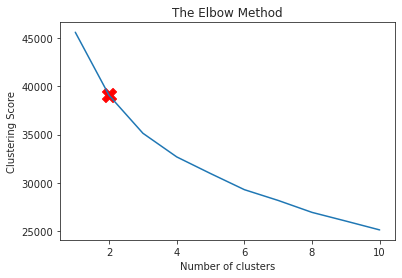

In [116]:
#Elbow method to measure how our model works
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.
plt.plot(range(1, 11), cs)
plt.scatter(2,cs[1], s = 200, c = 'red', marker='X')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Clustering Score')
plt.show() 

## Compare the Silhouette scores for clusters up to 10 

In [117]:
#silhouette score needs to be near 1 rather than -1
from sklearn.metrics import silhouette_score, silhouette_samples

for n_clusters in range(2,11):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(df)
    centers = km.cluster_centers_

    score = silhouette_score(df, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4655578254479565
For n_clusters = 3, silhouette score is 0.37983935312155875
For n_clusters = 4, silhouette score is 0.385698979883062
For n_clusters = 5, silhouette score is 0.39590169268464354
[CV 2/5] END .............................C=1.0;, score=0.591 total time=   0.2s
[CV 1/5] END .............................C=2.0;, score=0.500 total time=   0.1s
[CV 3/5] END .............................C=2.0;, score=0.500 total time=   0.0s
[CV 5/5] END .............................C=2.0;, score=0.597 total time=   0.2s
[CV 2/5] END .............................C=3.0;, score=0.591 total time=   0.2s
[CV 1/5] END .............................C=4.0;, score=0.500 total time=   0.1s
[CV 4/5] END .............................C=4.0;, score=0.594 total time=   0.3s
[CV 4/5] END .............................C=5.0;, score=0.594 total time=   0.2s
[CV 3/5] END .............................C=6.0;, score=0.500 total time=   0.0s
[CV 5/5] END .....................

# 10- PCA Decomposition

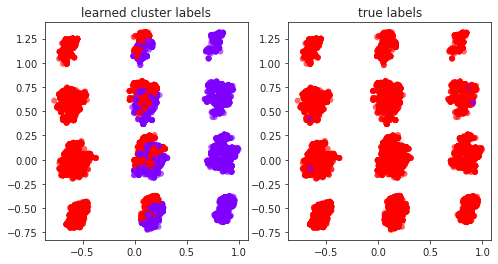

In [118]:
from sklearn.decomposition import PCA

X = PCA(2).fit_transform(X)

kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 2),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X[:, 0], X[:, 1], c=labels, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X[:, 0], X[:, 1], c=y, **kwargs)
ax[1].set_title('true labels');

[[   35    47]
 [ 9971 13853]]


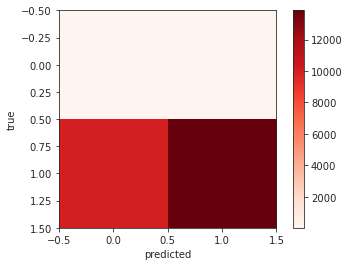

In [119]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, labels))

plt.imshow(confusion_matrix(y, labels),
           cmap='Reds', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

[[   35    47]
 [ 9971 13853]]
[[   35    47]
 [ 9971 13853]]


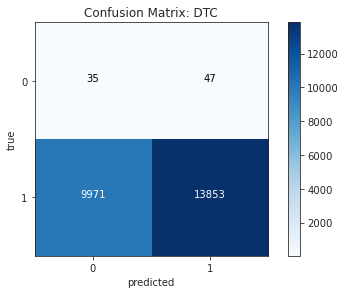

In [120]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, labels))
vis_conf_mat(confusion_matrix(y, labels), classes=class_names, normalize = False, 
                      title='Confusion Matrix: DTC')

plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

In [121]:
print(classification_report(y, labels))

              precision    recall  f1-score   support

           0       0.00      0.43      0.01        82
           1       1.00      0.58      0.73     23824

    accuracy                           0.58     23906
   macro avg       0.50      0.50      0.37     23906
weighted avg       0.99      0.58      0.73     23906



# EXTRA Gaussian Mixture Model

In [122]:
## Import the GaussianMixture class
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=123, n_init=10)
preds = gm.fit_predict(X)
correct_labels = sum(y == preds)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 13362 out of 23906 samples were correctly labeled.
Accuracy score: 0.56
